In [142]:
import numpy as np
import healpy as hp
import healpy.rotator as hpr
import healpy.pixelfunc as hpf
import healpy.visufunc as hpv
import astropy as ap
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
 
# NSIDE=32
# m=np.arange(hp.nside2npix(NSIDE))
# print m.shape, m[0:10], m[m.shape[0]-10:m.shape[0]]
# hp.mollview(m, title="Test")

In [143]:
from HERA_MapMaking_VisibilitySimulation import DATA_PATH
print (DATA_PATH)

/Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/data


In [144]:
outfile_GSM_name = DATA_PATH + '/Results_Fits_w-Data-CG-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-150.73-gW-0.048978-150.7324MHz-dipole-nubl990-nt1530-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N-774.44.fits'
map_1 = fits.getdata(outfile_GSM_name).squeeze()

Filename: /Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/data/Results_Fits_w-Data-CG-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-150.73-gW-0.048978-150.7324MHz-dipole-nubl990-nt1530-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N-774.44.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (12288,)   float64   
Data shape, min, max:  (12288,) -139.58774575294163 1084.8540418213663
STD of the Map32-wholeday without Fornax A: 30.5973010187


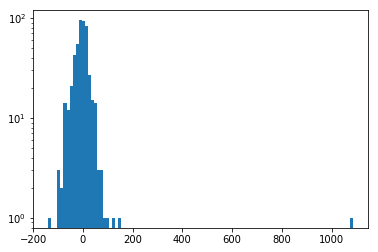

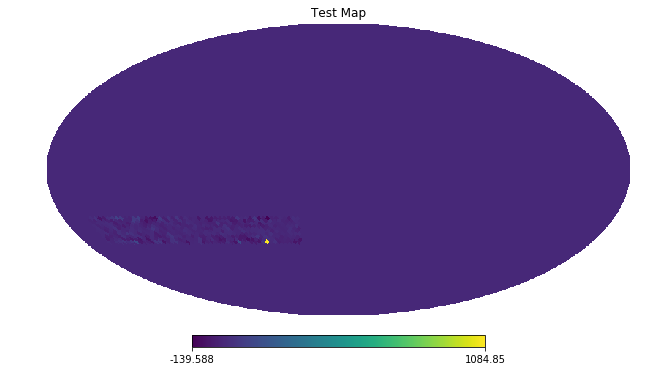

In [188]:
# hdul = fits.open('test.fits')
hdul = fits.open(outfile_GSM_name)
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
map_fit = fits.getdata(outfile_GSM_name)
print('STD of the Map32-wholeday without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-1]][np.abs(map_fit[np.argsort(map_fit)[:-1]]) > 10**(-5)])))
plt.hist(map_fit[np.abs(map_fit) > 10.**(-5)],bins=100, log=True)
hdul.close()
hp.mollview(map_fit, nest=True, title="Test Map")

In [190]:
nside_standard = 32
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_whole_32 = fits.getdata(outfile_GSM_name).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_whole_32)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_whole_32)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_whole_32[np.argsort(ww_solution_whole_32)[-40:]]))





Bright_Pixels_Data: [[-35.68533471 -25.94447977 -30.         -32.7971683  -32.7971683
  -32.7971683  -27.27961274 -27.27961274 -30.         -31.38816646
  -25.94447977 -28.63098984 -32.7971683  -37.16889966 -34.22886633
  -28.63098984 -32.7971683  -32.7971683  -31.38816646 -27.27961274
  -30.         -27.27961274 -35.68533471 -30.         -32.7971683
  -30.         -31.38816646 -31.38816646 -31.38816646 -32.7971683
  -32.7971683  -27.27961274 -31.38816646 -35.68533471 -35.68533471
  -24.62431835 -27.27961274 -31.38816646 -24.62431835 -35.68533471
  -30.         -24.62431835 -31.38816646 -31.38816646 -34.22886633
  -30.         -24.62431835 -32.7971683  -34.22886633 -31.38816646
  -30.         -31.38816646 -28.63098984 -24.62431835 -34.22886633
  -32.7971683  -37.16889966 -28.63098984 -27.27961274 -27.27961274
  -25.94447977 -27.27961274 -31.38816646 -31.38816646 -28.63098984
  -34.22886633 -31.38816646 -27.27961274 -32.7971683  -24.62431835
  -37.16889966 -25.94447977 -25.94447977 -25.

80.0 160.0 -46.1880215352 46.1880215352
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 10 deg 0.00'.


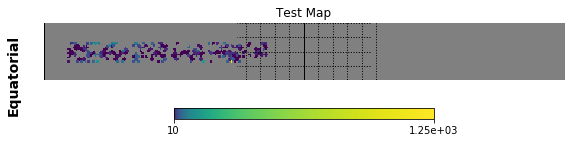

In [146]:
hp.cartview(testmap, title="Test Map", norm='log', min=10, max=1250, coord='C', latra=[-50,-10],xsize=360, nest=True)
hp.graticule(dpar=10,dmer=10)

In [147]:
filenames_32 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [148]:
filenames_64 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [149]:
filenames_32_321 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [150]:
filenames_64_321 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [162]:
filenames_32_415 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [163]:
filenames_64_415 = sorted(glob.glob("{0}/../data/results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-*-gW-0.048978-*-dipole-*-*-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits".format(DATA_PATH)))

In [165]:
filenames_64_415[0].split('/')[-1]

'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt658-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits'

(0, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt1578-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map32-wholeday without Fornax A: 68.9714160121
(1, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-119.48-gW-0.048978-119.4824MHz-dipole-nubl990-nt1341-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map32-wholeday without Fornax A: 88.2799794902
(2, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-130.42-gW-0.048978-130.4199MHz-dipole-nubl990-nt1559-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map32-wholeday without Fornax A: 37.4454265654
(3, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-139.79-gW-0.048978-139.7949MHz-dipole-nubl

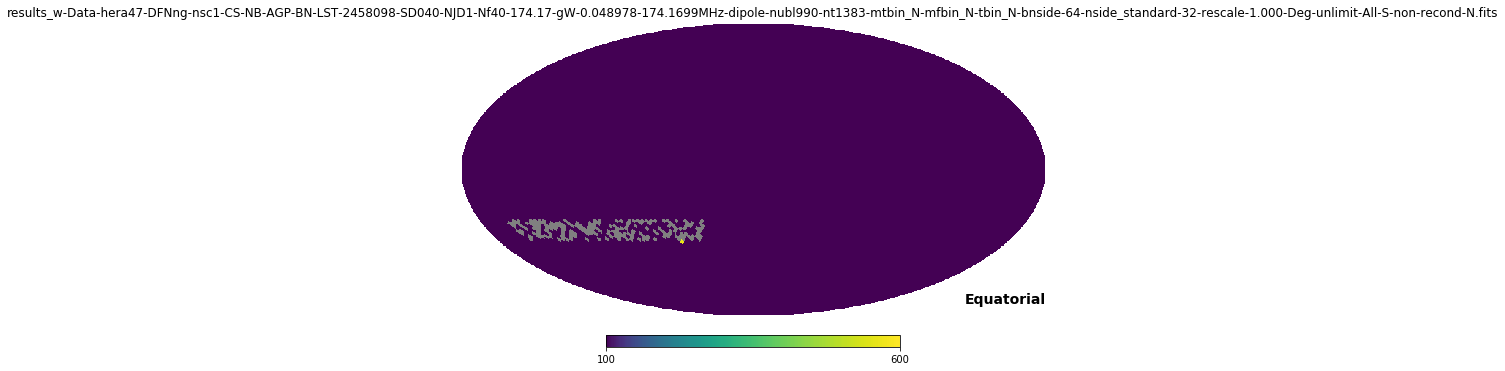

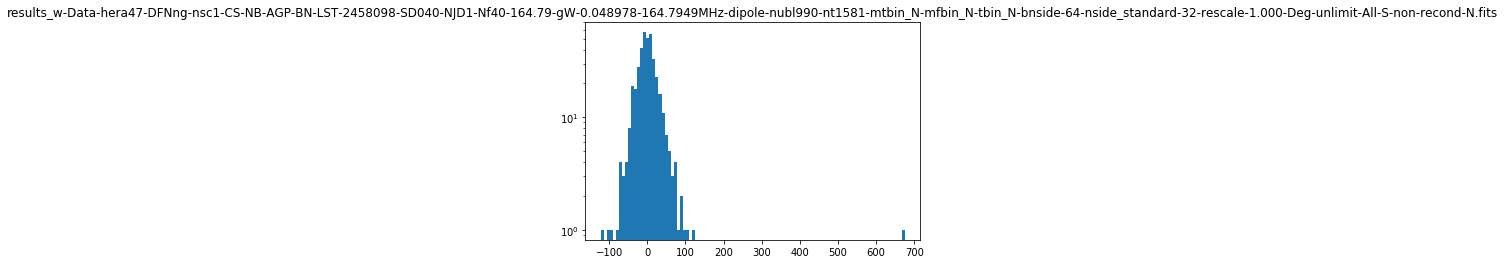

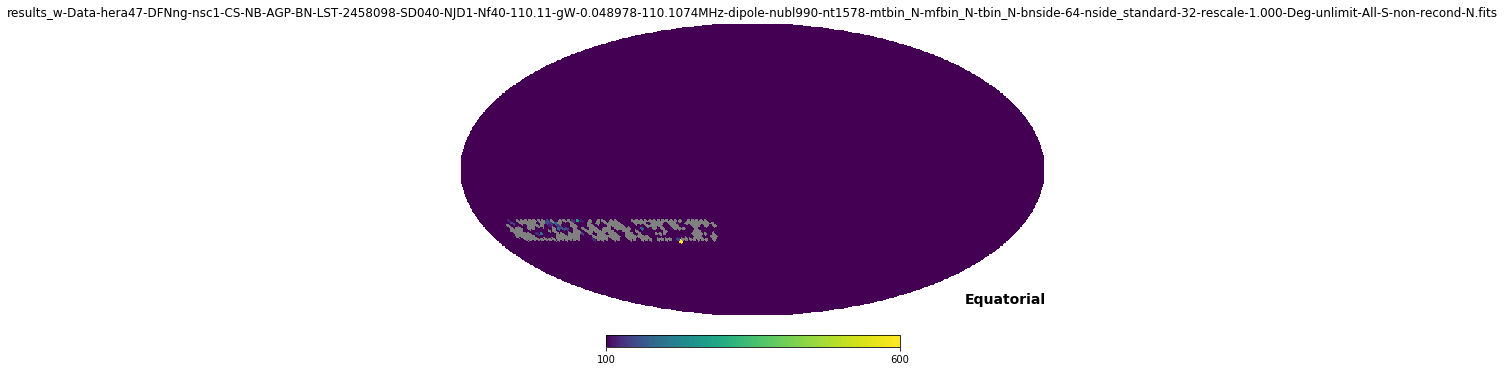

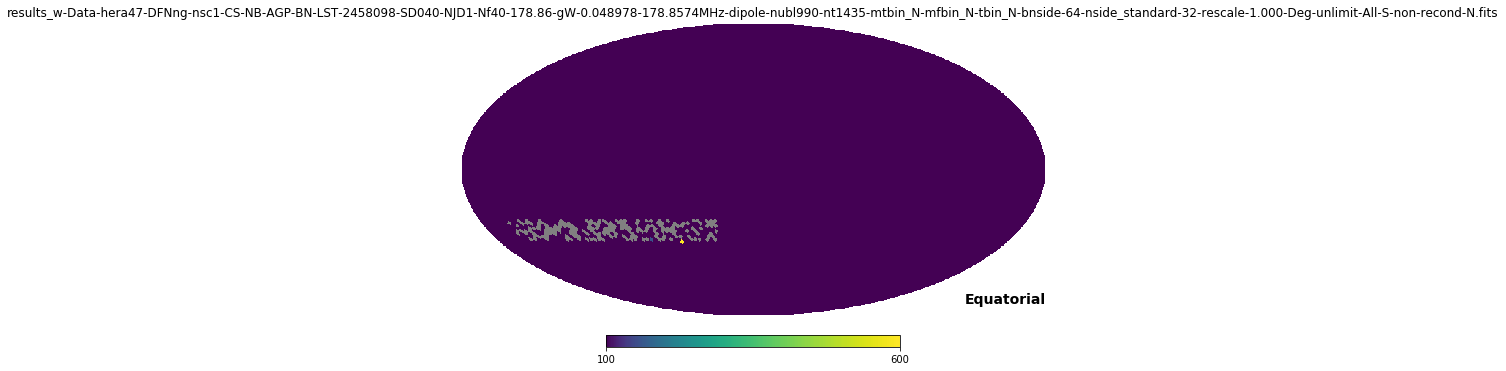

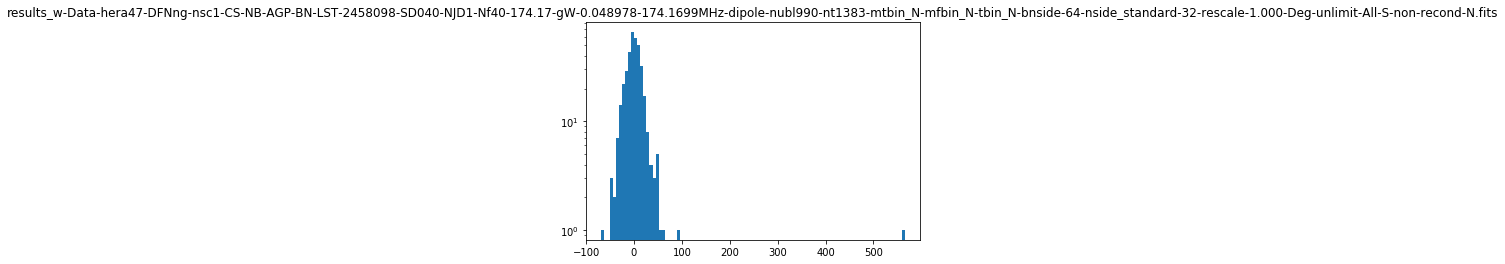

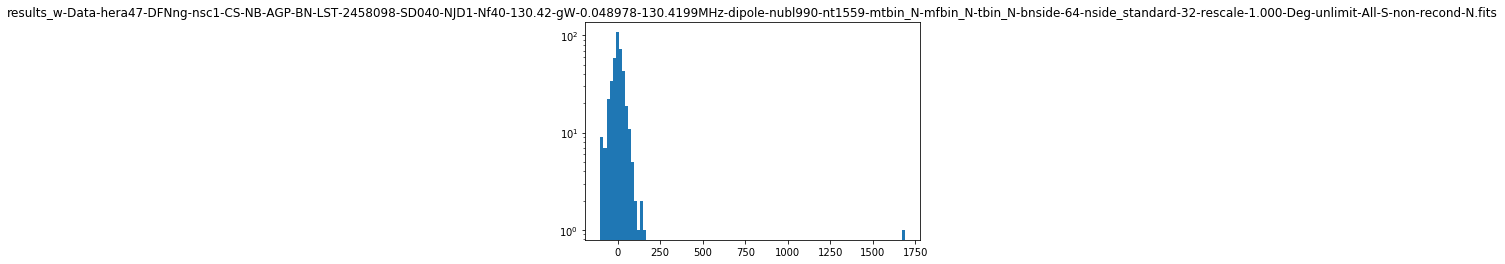

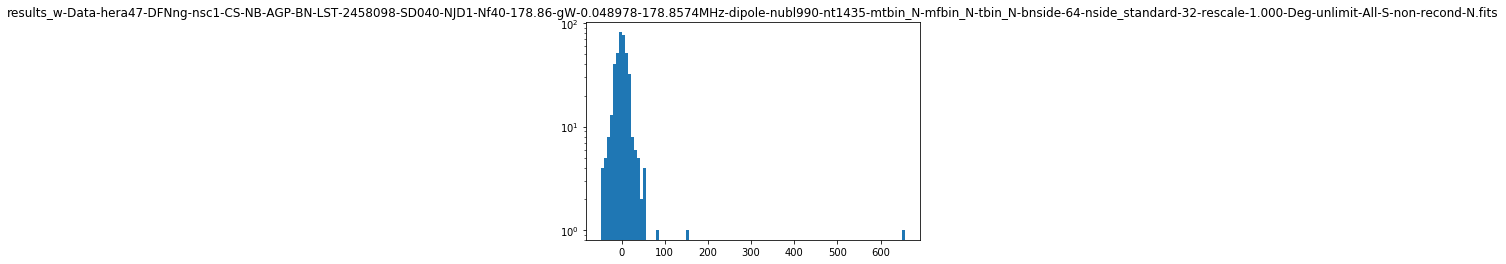

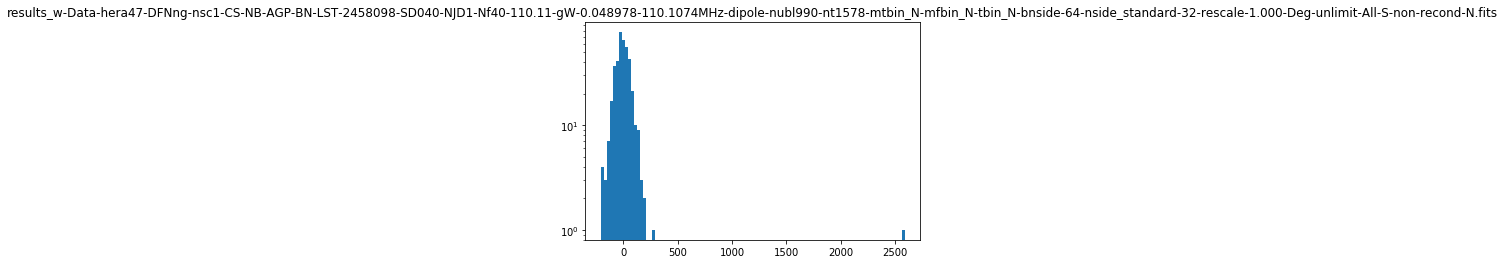

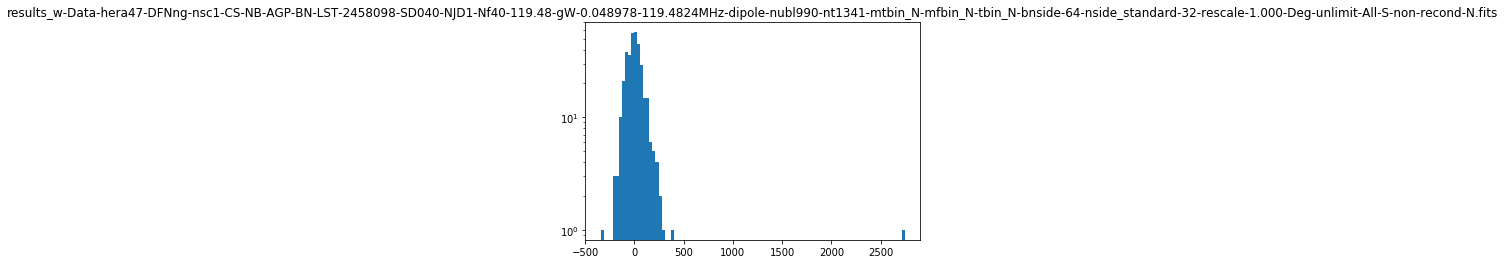

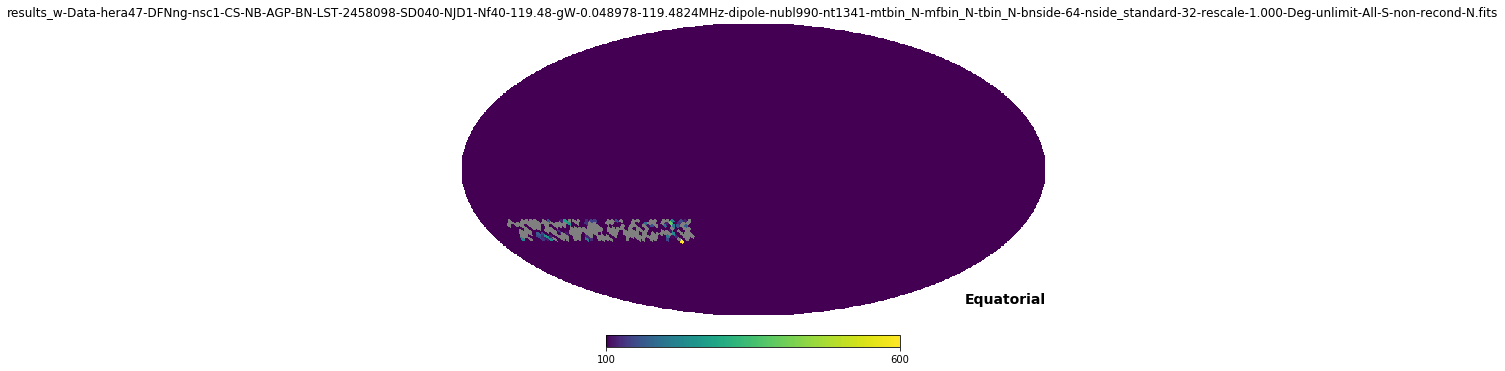

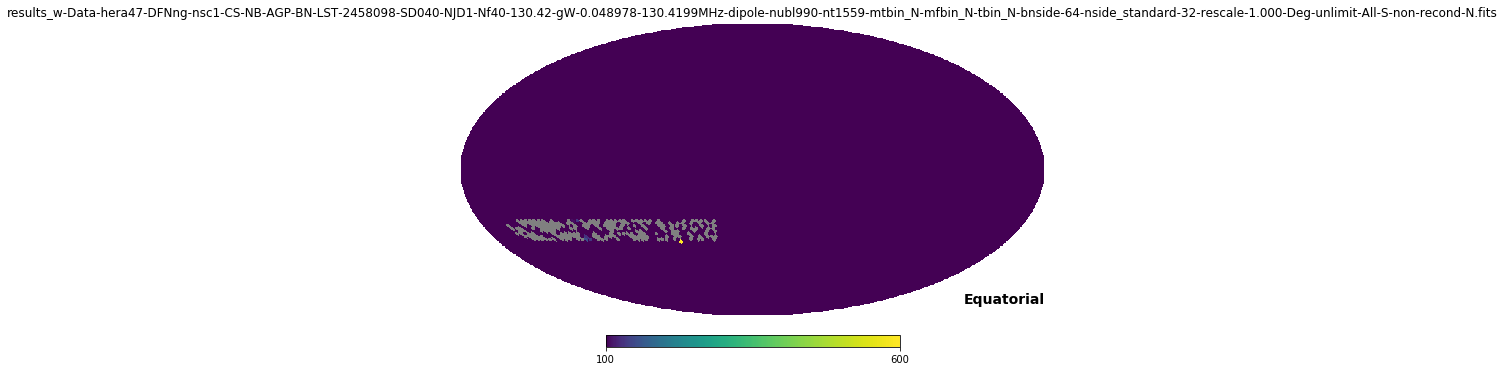

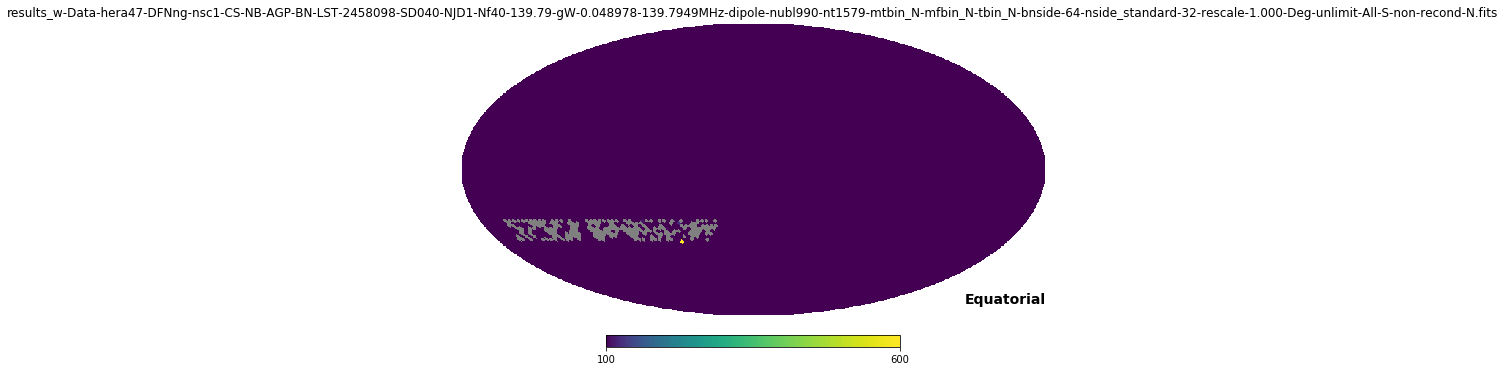

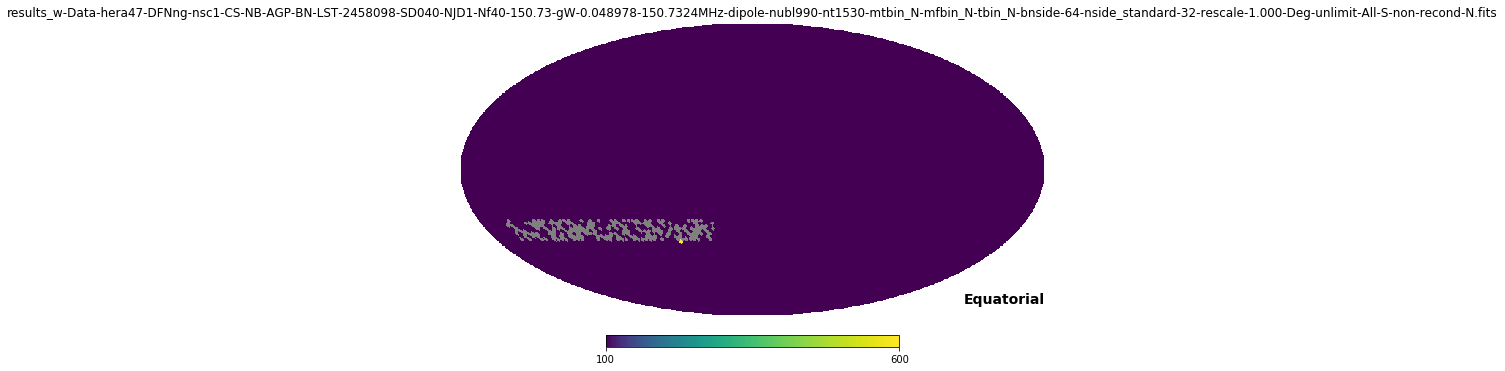

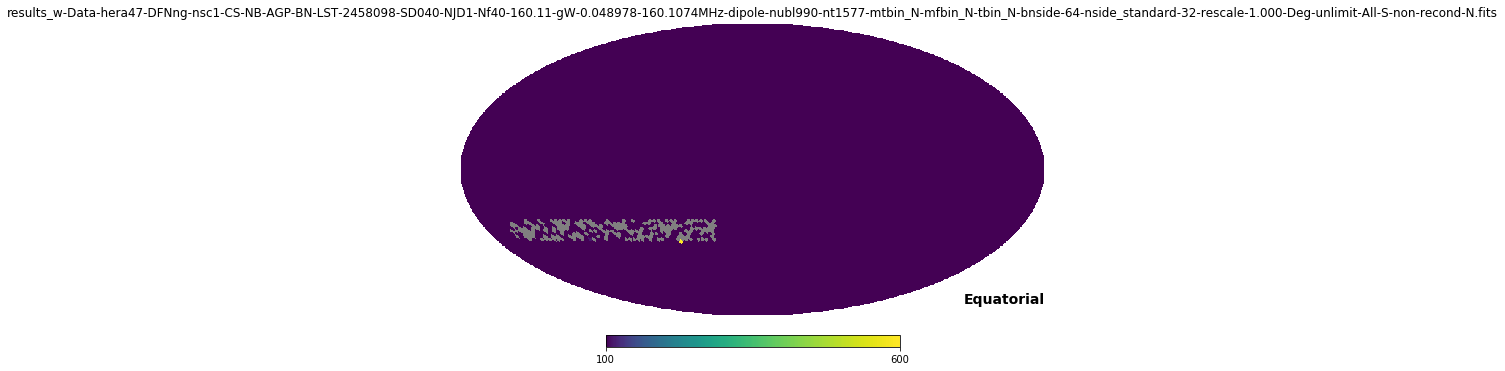

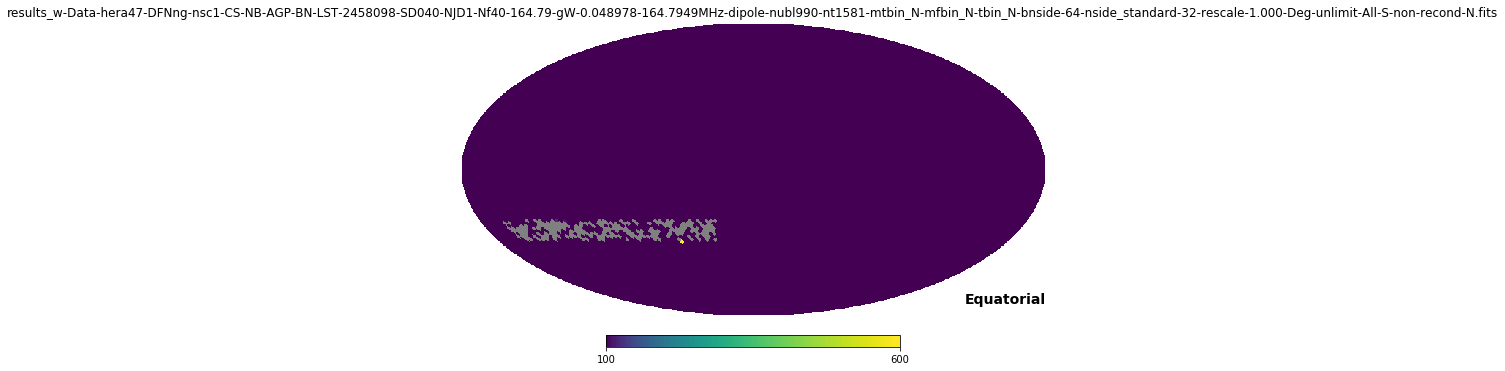

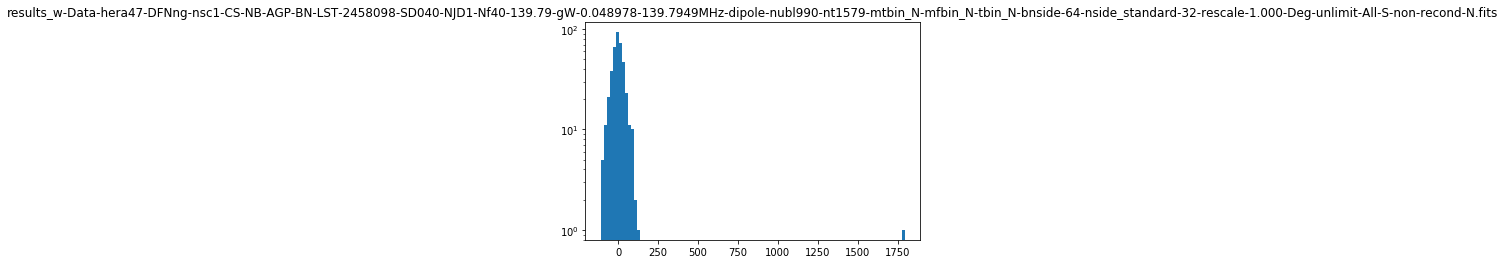

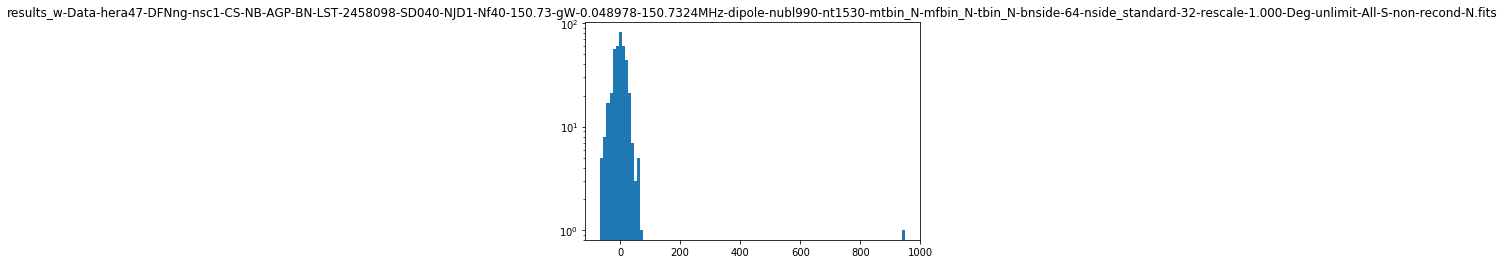

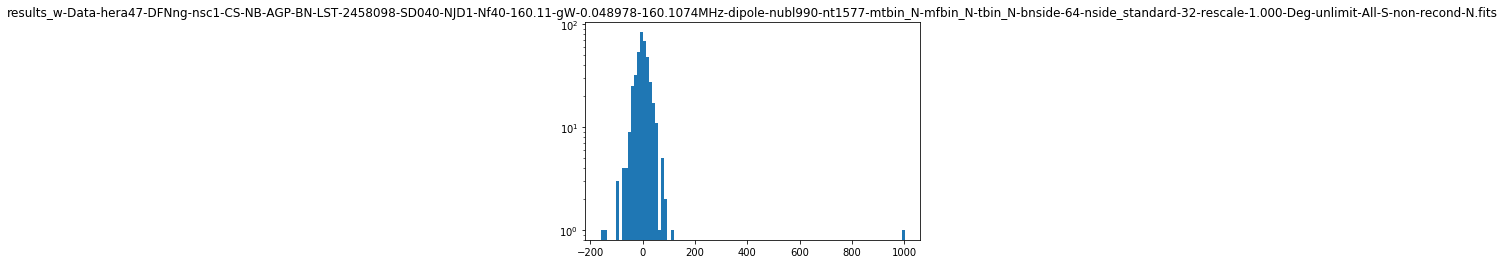

In [152]:
for id_file, fitfile in enumerate(filenames_32):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('STD of the Map32-wholeday without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-1]][np.abs(map_fit[np.argsort(map_fit)[:-1]]) > 10**(-5)])))
    plt.figure(10000 + id_file)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(50000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()
    

In [189]:
nside_standard = 32
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_whole_32 = fits.getdata(filenames_32[8]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_whole_32)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_whole_32)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_whole_32[np.argsort(ww_solution_whole_32)[-40:]]))




Bright_Pixels_Data: [[-27.27961274 -32.7971683  -25.94447977 -28.63098984 -31.38816646
  -31.38816646 -31.38816646 -28.63098984 -27.27961274 -32.7971683
  -27.27961274 -25.94447977 -28.63098984 -31.38816646 -27.27961274
  -28.63098984 -34.22886633 -25.94447977 -28.63098984 -25.94447977
  -31.38816646 -32.7971683  -28.63098984 -32.7971683  -30.
  -30.         -31.38816646 -28.63098984 -32.7971683  -35.68533471
  -25.94447977 -30.         -27.27961274 -34.22886633 -32.7971683
  -25.94447977 -30.         -34.22886633 -27.27961274 -31.38816646
  -35.68533471 -32.7971683  -28.63098984 -35.68533471 -34.22886633
  -32.7971683  -31.38816646 -27.27961274 -25.94447977 -35.68533471
  -28.63098984 -28.63098984 -27.27961274 -30.         -32.7971683
  -28.63098984 -31.38816646 -25.94447977 -31.38816646 -34.22886633
  -30.         -25.94447977 -28.63098984 -32.7971683  -35.68533471
  -27.27961274 -34.22886633 -34.22886633 -27.27961274 -34.22886633
  -34.22886633 -34.22886633 -27.27961274 -35.68533471

(0, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt1578-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map64-wholeday without Fornax A: 882.208780813
(1, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-119.48-gW-0.048978-119.4824MHz-dipole-nubl990-nt1341-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map64-wholeday without Fornax A: 1253.60607848
(2, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-130.42-gW-0.048978-130.4199MHz-dipole-nubl990-nt1559-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map64-wholeday without Fornax A: 693.744862078
(3, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD040-NJD1-Nf40-139.79-gW-0.048978-139.7949MHz-dipole-nubl

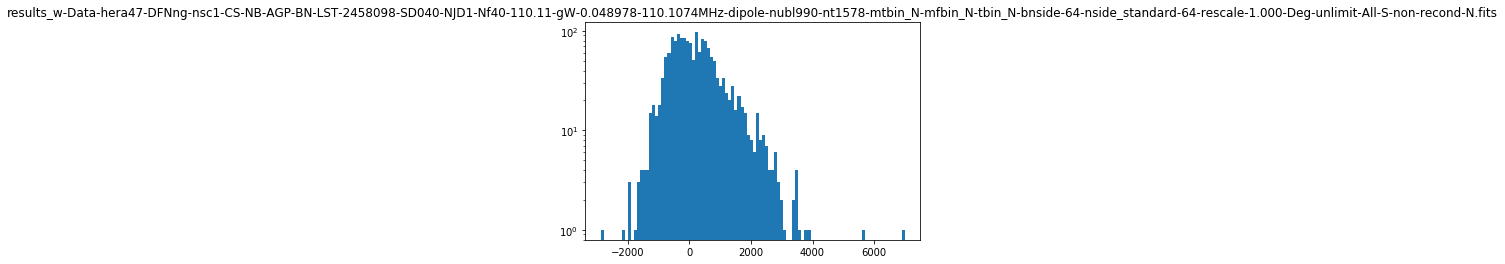

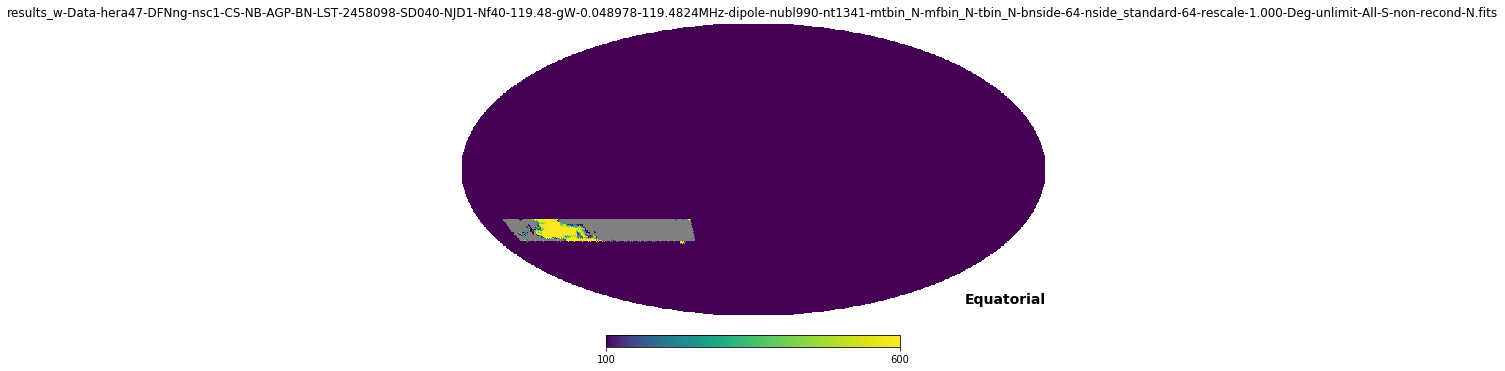

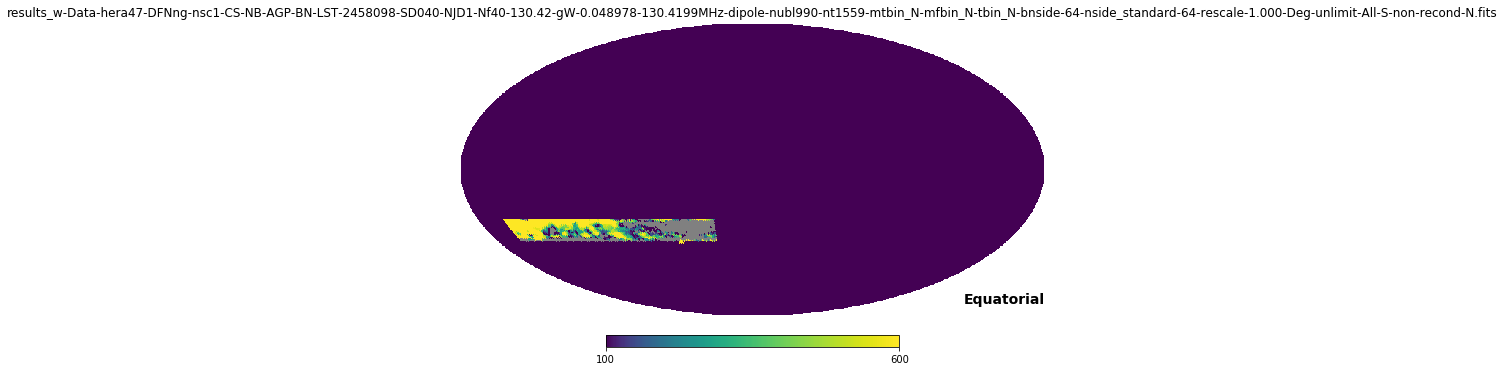

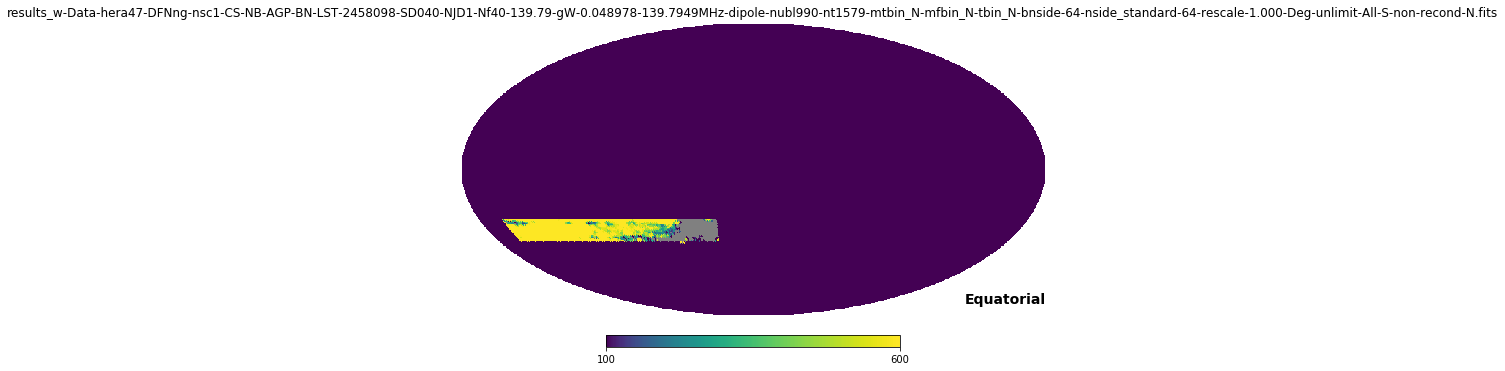

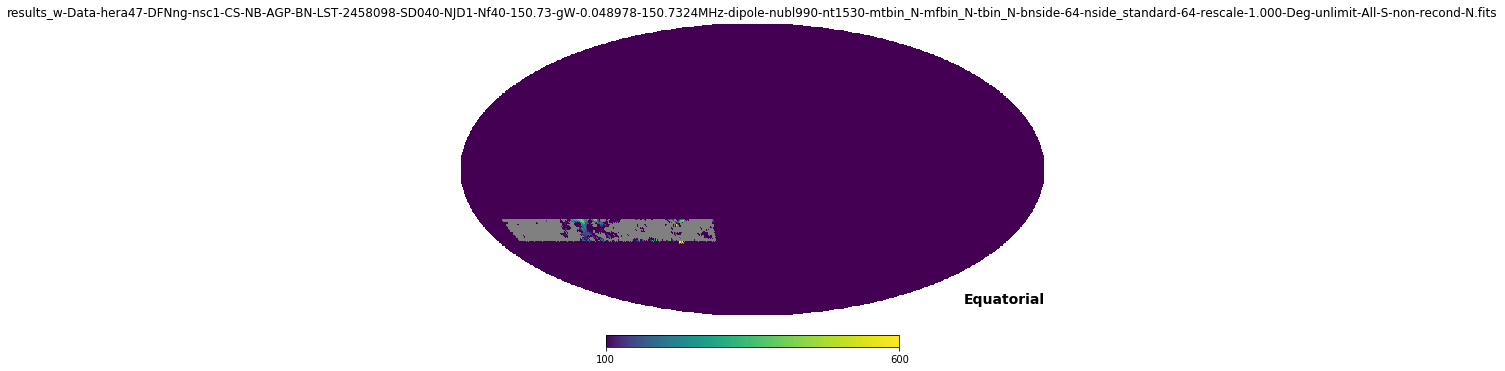

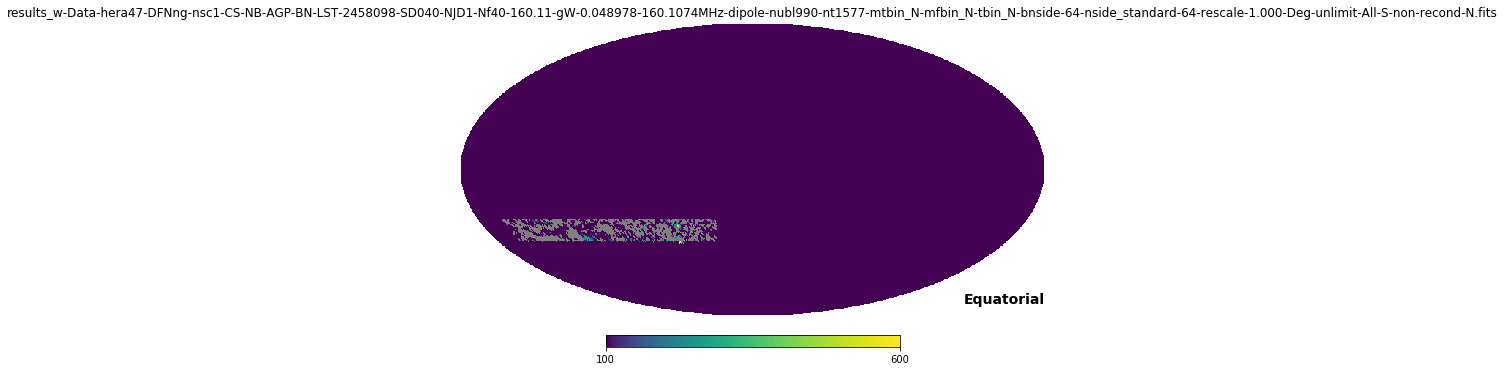

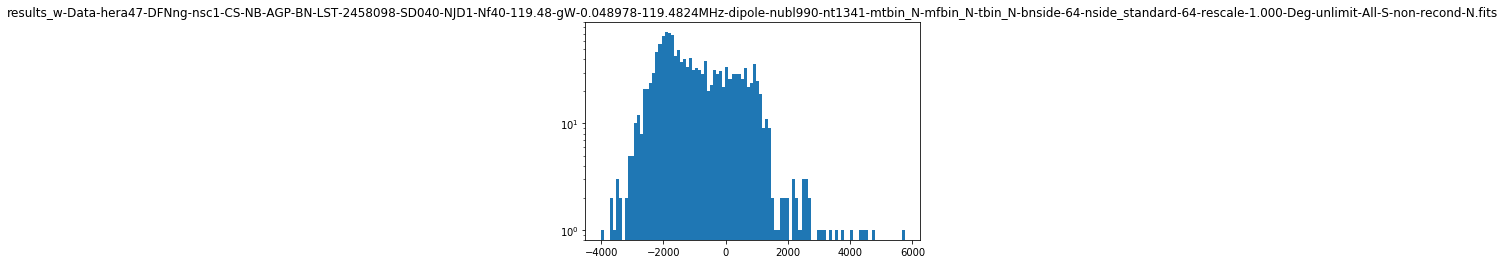

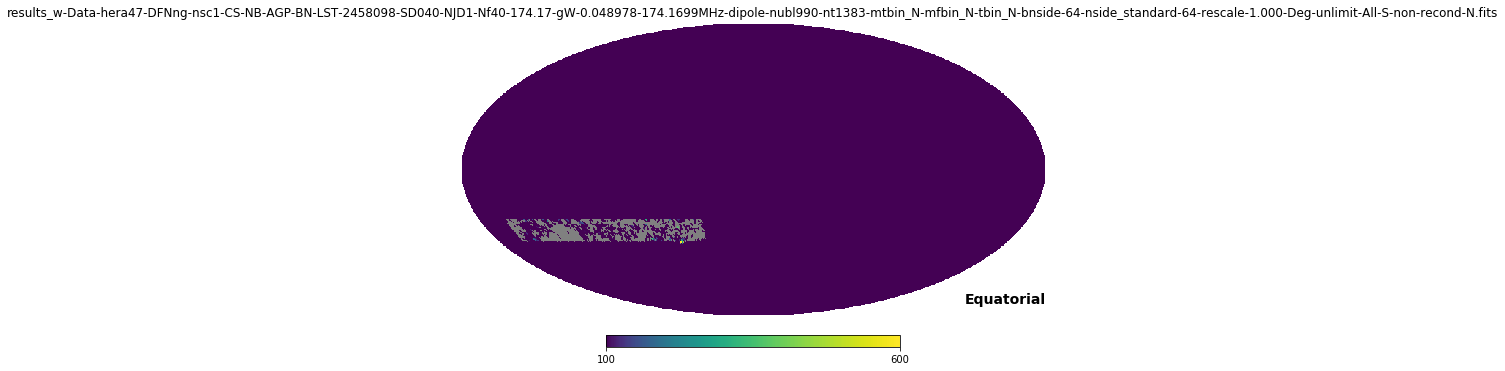

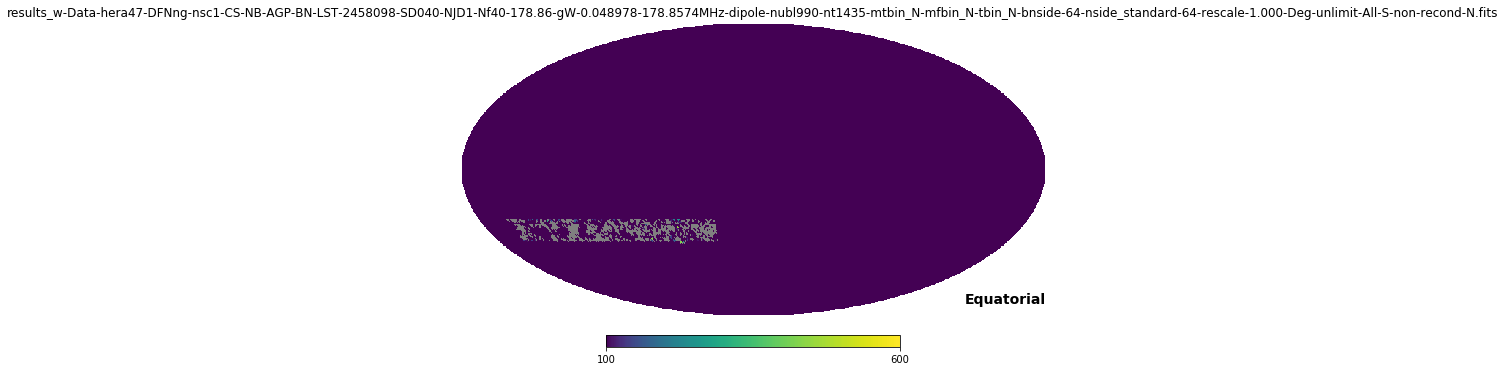

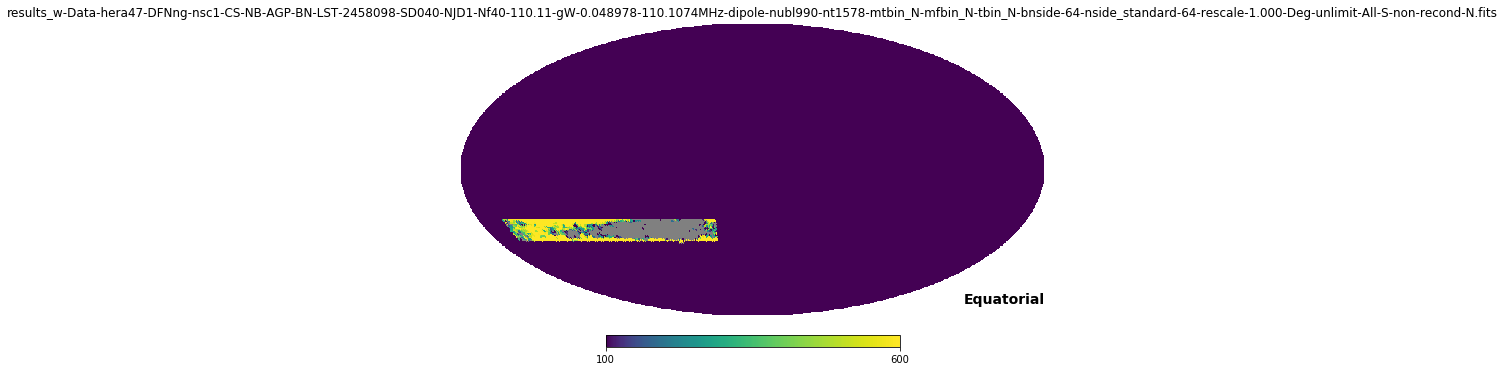

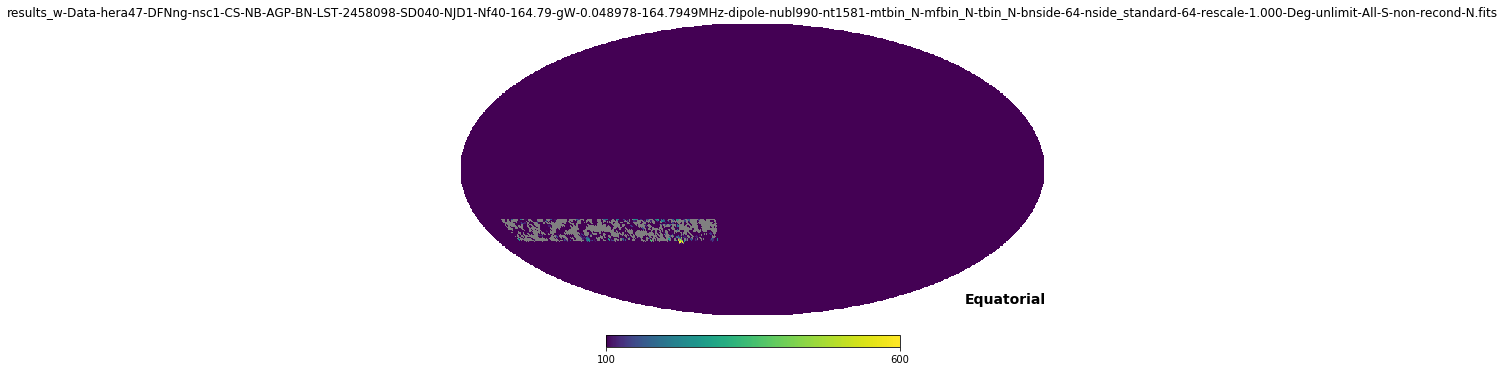

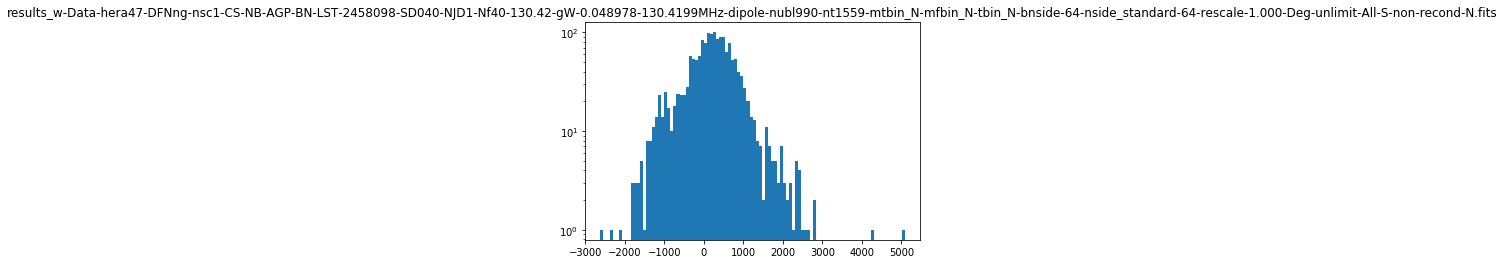

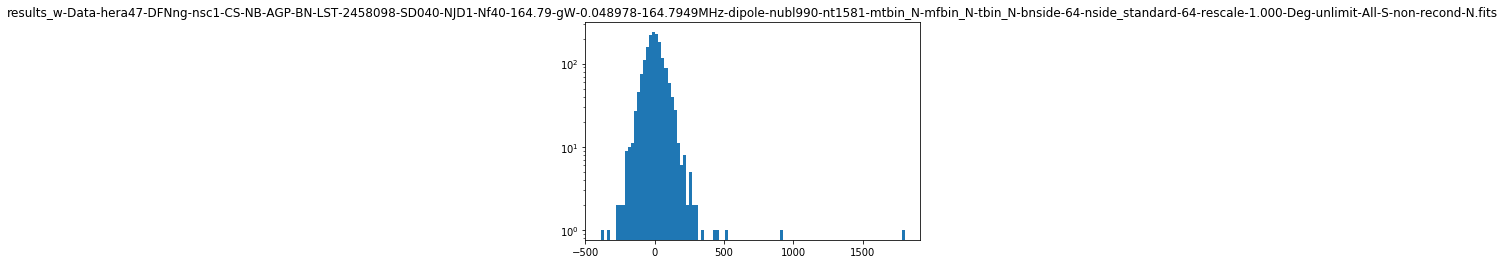

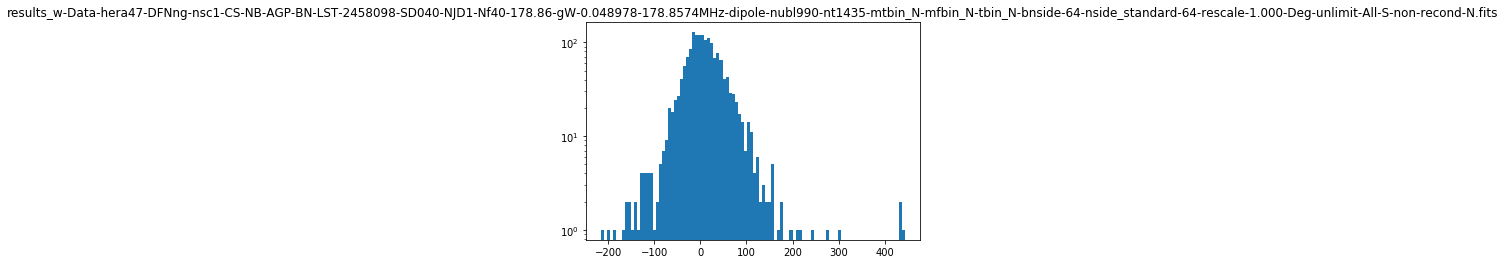

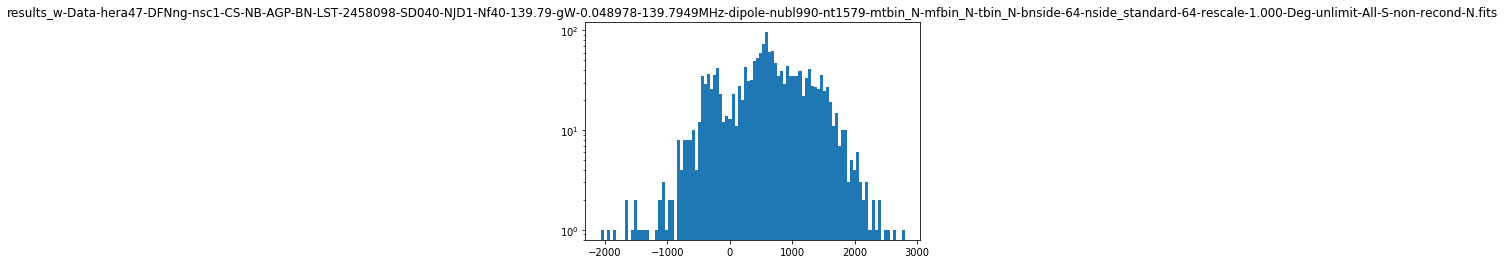

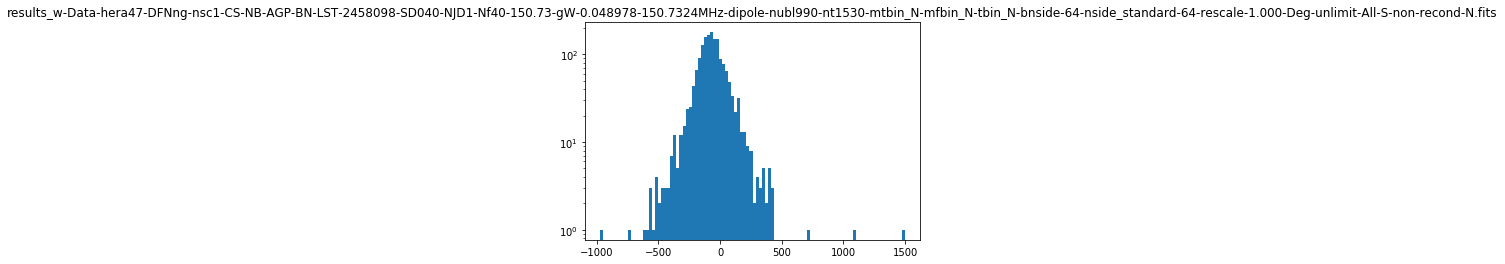

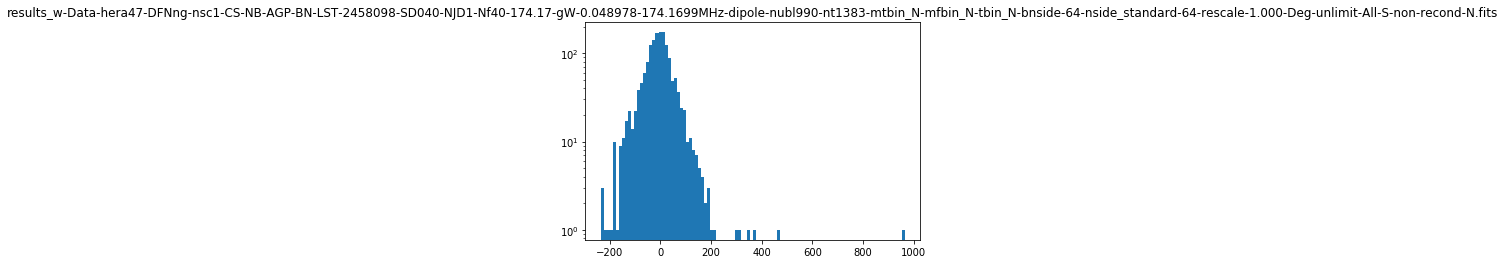

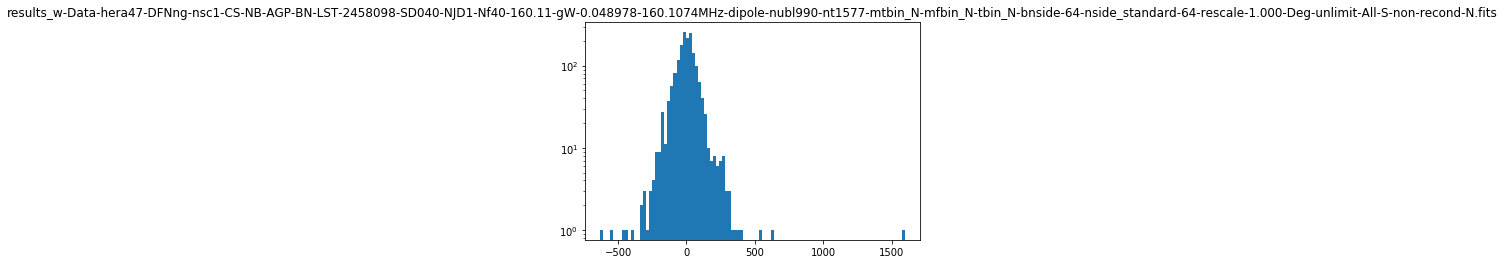

In [154]:
for id_file, fitfile in enumerate(filenames_64):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('STD of the Map64-wholeday without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-2]][np.abs(map_fit[np.argsort(map_fit)[:-2]]) > 10**(-5)])))
    plt.figure(100000 + id_file)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(500000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()

In [155]:
nside_standard = 64
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_whole_64 = fits.getdata(filenames_64[4]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_whole_64)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_whole_64)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_whole_64[np.argsort(ww_solution_whole_64)[-80:]]))

Bright_Pixels_Data: [[-36.42357364 -34.22886633 -35.68533471 -26.61009781 -30.
  -36.42357364 -25.28260304 -28.63098984 -34.22886633 -33.51005607
  -33.51005607 -25.28260304 -36.42357364 -36.42357364 -26.61009781
  -32.7971683  -33.51005607 -30.         -25.94447977 -34.22886633
  -33.51005607 -26.61009781 -32.7971683  -32.08995126 -27.95318688
  -36.42357364 -25.94447977 -29.31319896 -25.28260304 -32.08995126
  -31.38816646 -32.08995126 -35.68533471 -25.28260304 -25.28260304
  -35.68533471 -27.95318688 -27.27961274 -25.28260304 -32.7971683
  -30.69158768 -35.68533471 -32.7971683  -25.94447977 -36.42357364
  -26.61009781 -27.27961274 -33.51005607 -32.7971683  -27.95318688
  -26.61009781 -27.27961274 -32.7971683  -26.61009781 -30.69158768
  -27.27961274 -30.         -25.94447977 -26.61009781 -36.42357364
  -25.94447977 -36.42357364 -34.95386526 -36.42357364 -25.94447977
  -28.63098984 -31.38816646 -33.51005607 -25.28260304 -25.28260304
  -36.42357364 -26.61009781 -27.95318688 -26.610097

(0, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt1041-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map32-part without Fornax A: 51.3984160812
(1, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-119.48-gW-0.048978-119.4824MHz-dipole-nubl990-nt803-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map32-part without Fornax A: 72.6326436825
(2, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-130.42-gW-0.048978-130.4199MHz-dipole-nubl990-nt1031-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map32-part without Fornax A: 30.7403869304
(3, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-139.79-gW-0.048978-139.7949MHz-dipole-nubl990-nt1038-mt

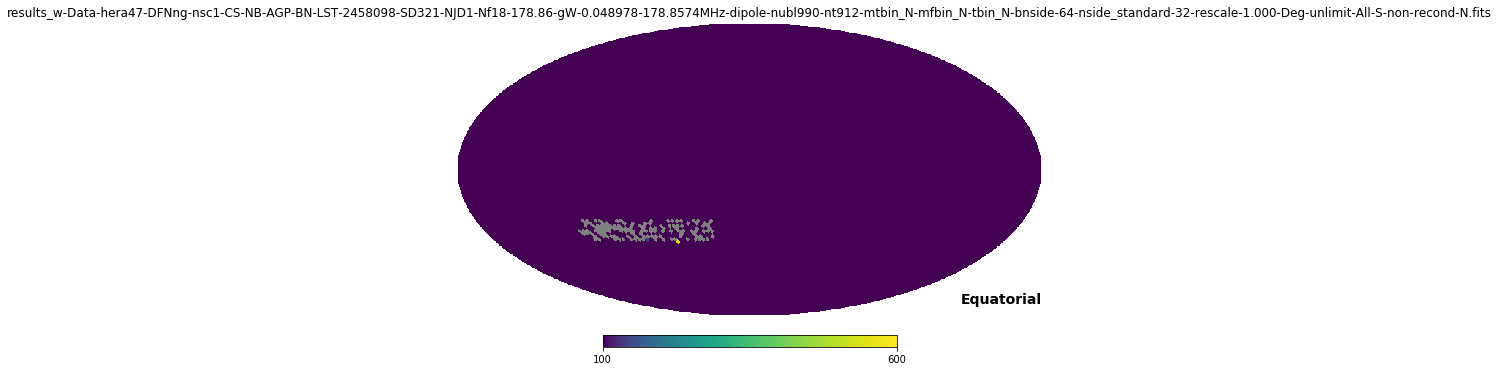

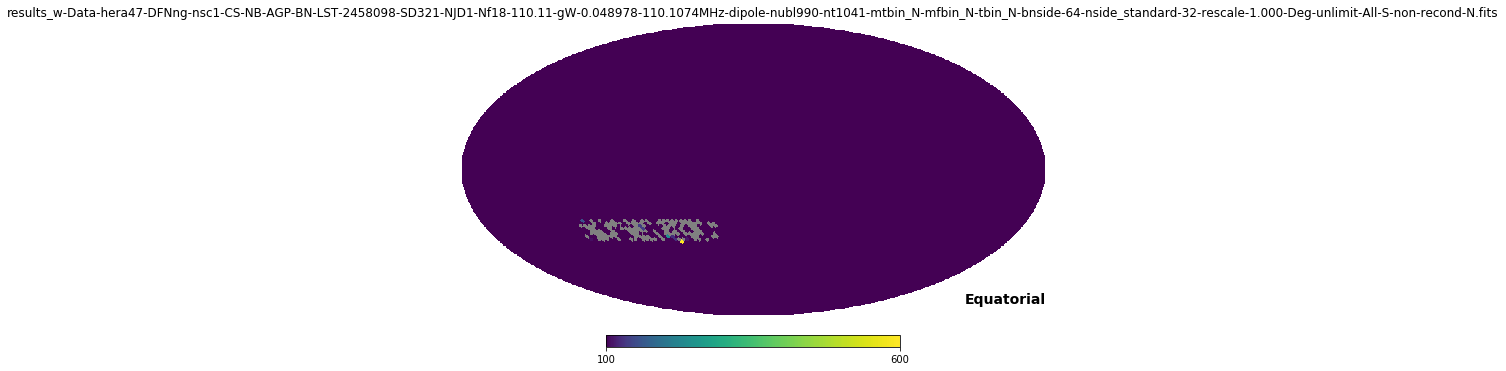

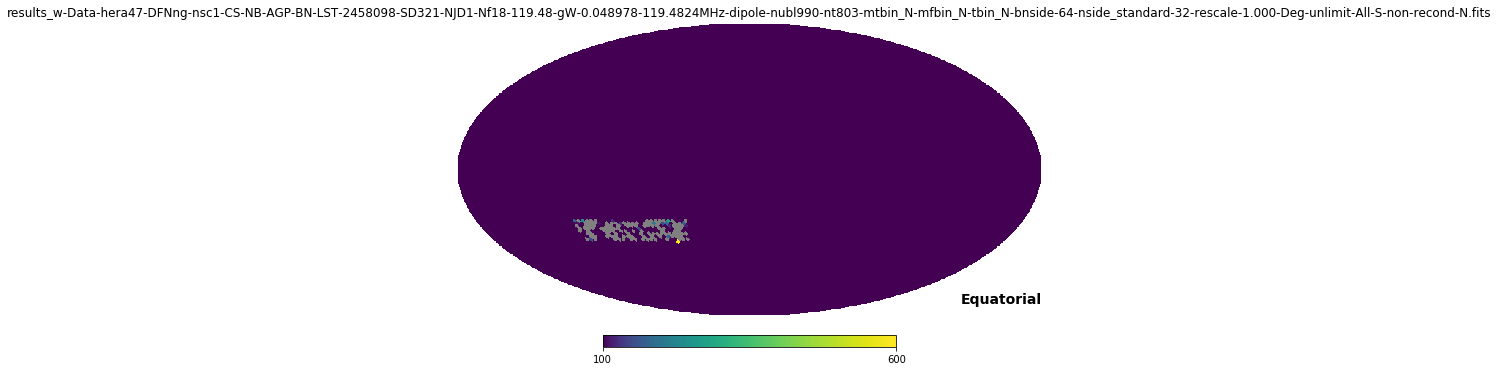

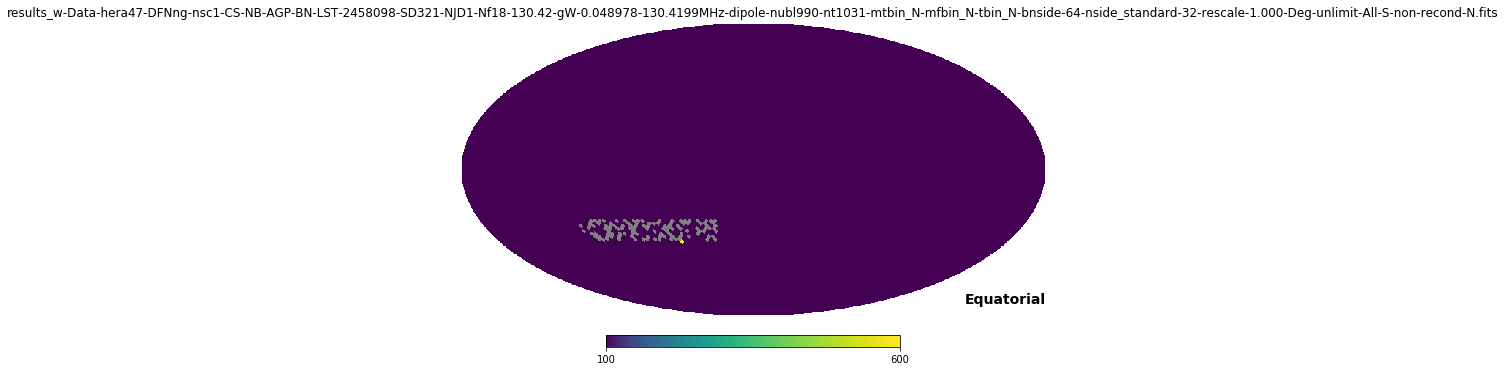

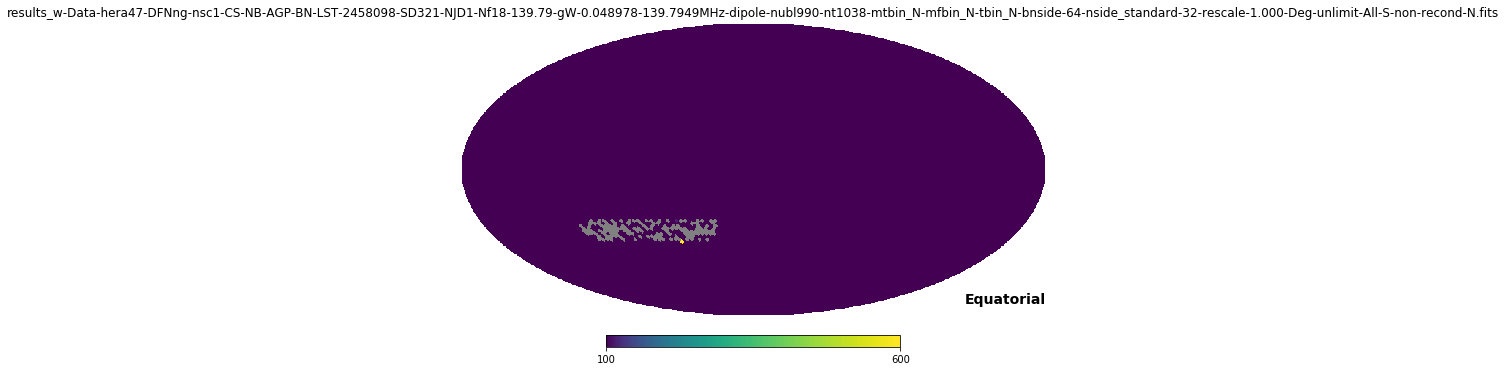

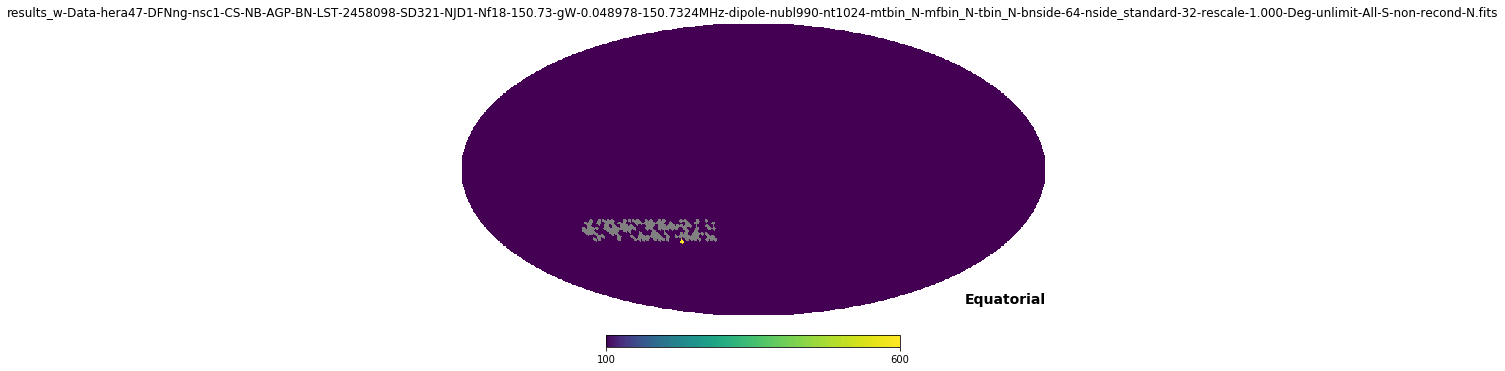

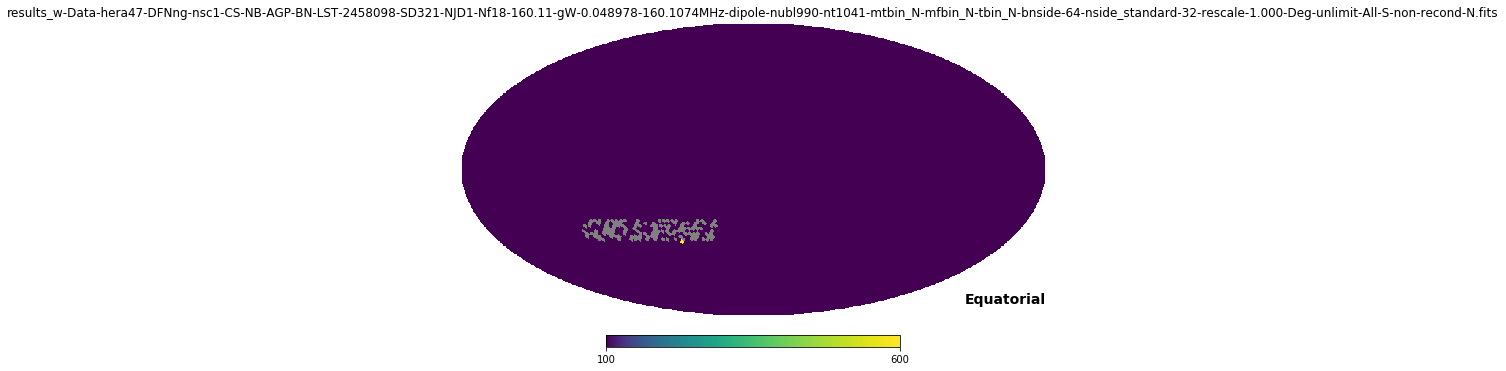

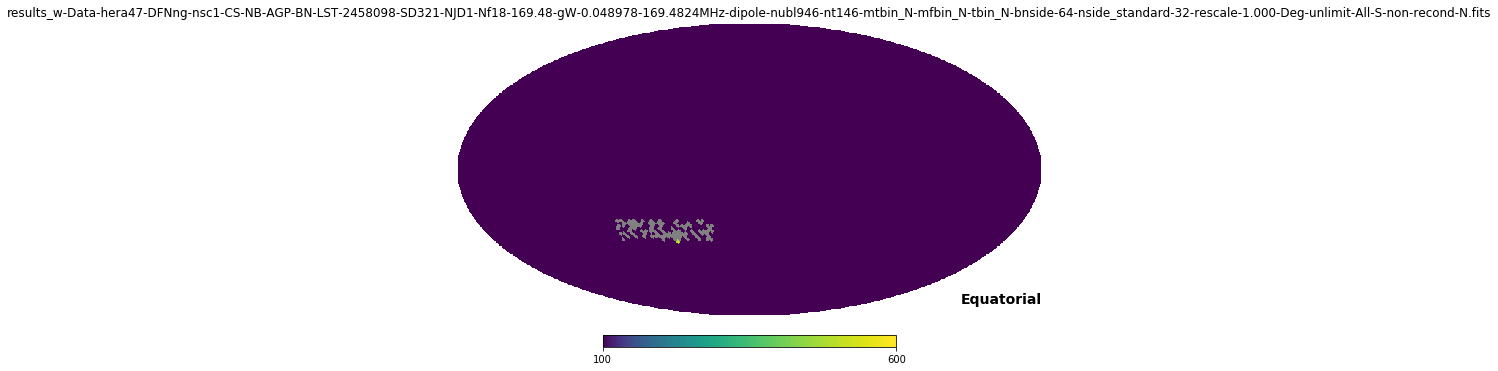

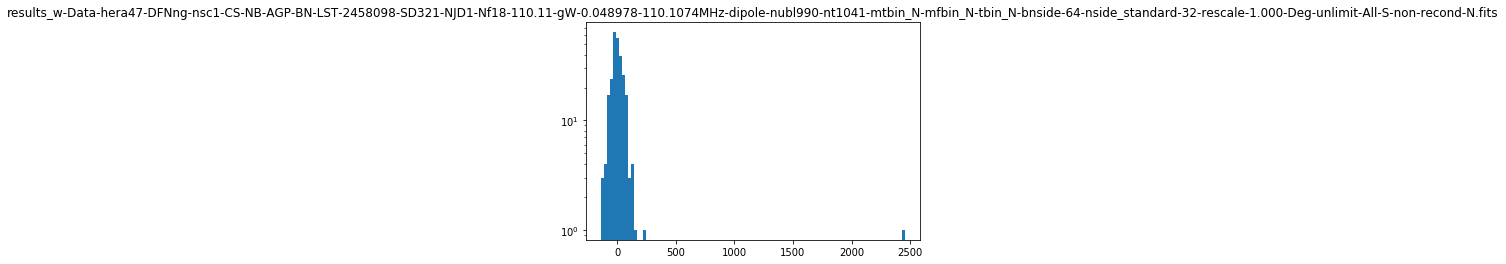

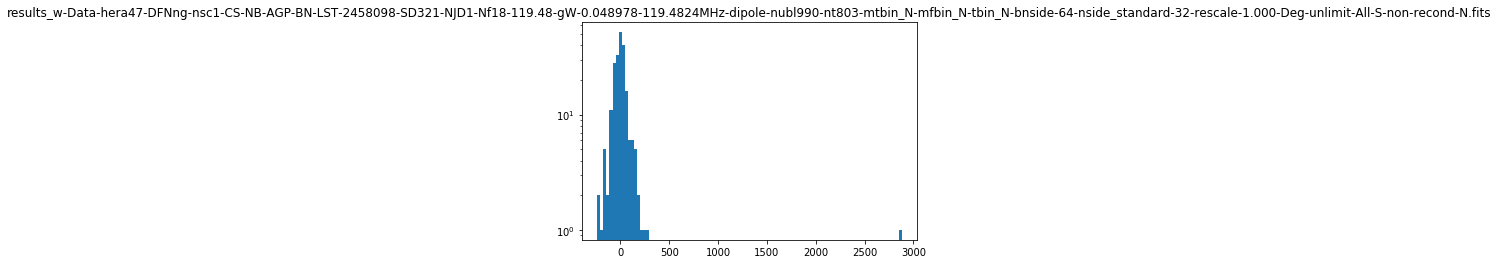

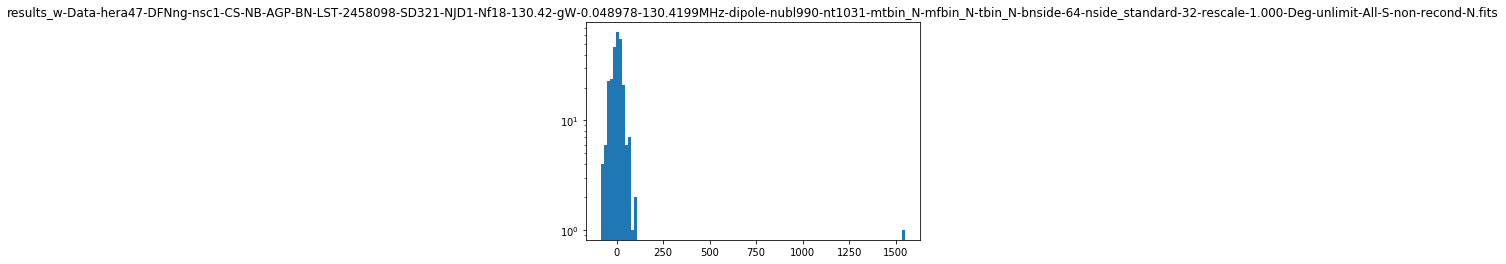

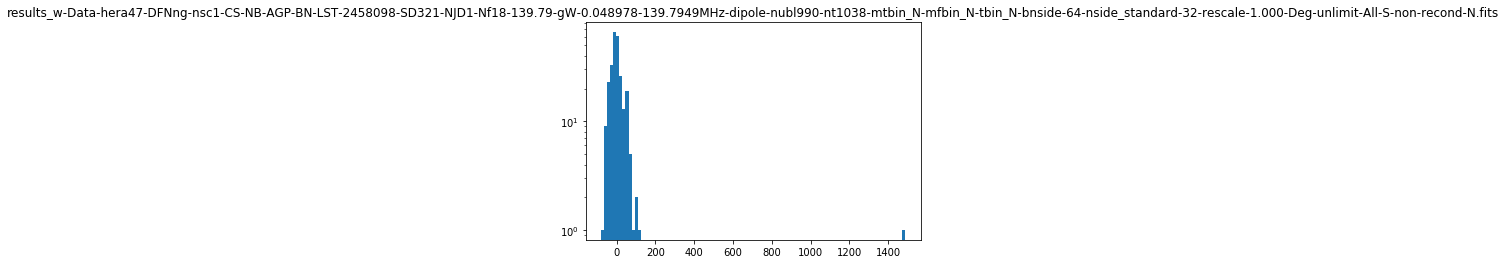

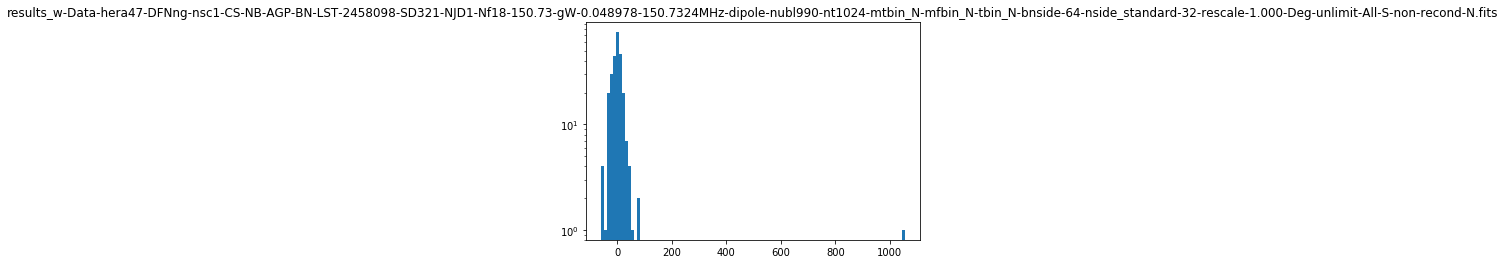

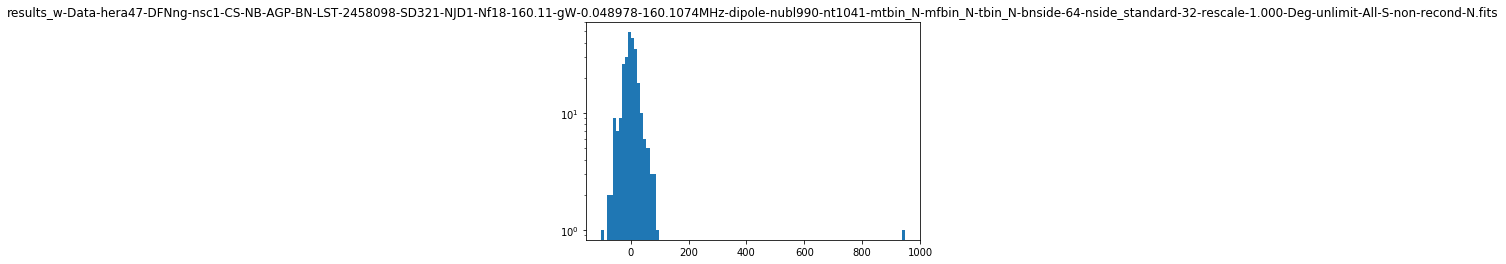

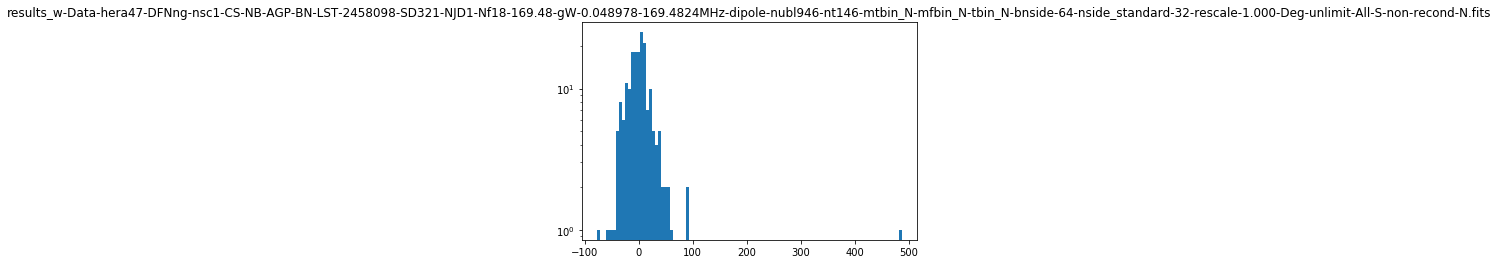

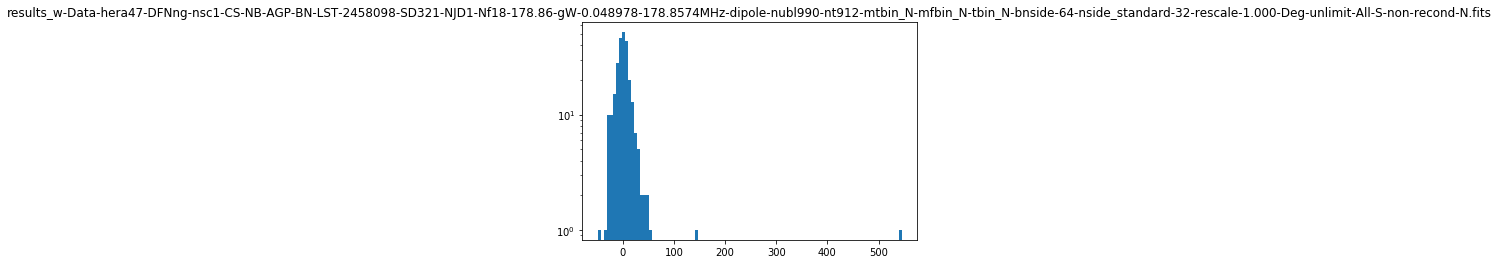

In [156]:
for id_file, fitfile in enumerate(filenames_32_321):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('STD of the Map32-part without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-1]][np.abs(map_fit[np.argsort(map_fit)[:-1]]) > 10**(-5)])))
    plt.figure(25000 + id_file)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(65000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()

In [157]:
np.std(map_fit[np.argsort(map_fit)[:-1]][np.abs(map_fit[np.argsort(map_fit)[:-1]]) > 10**(-5)]), map_fit[np.argsort(map_fit)[:-1]][np.abs(map_fit[np.argsort(map_fit)[:-1]]) > 10**(-5)].shape
# np.abs(map_fit).min()

(17.564819365076836, (260,))

In [158]:
nside_standard = 32
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_part_32 = fits.getdata(filenames_32_321[7]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_part_32)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_part_32)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_part_32[np.argsort(ww_solution_part_32)[-40:]]))



Bright_Pixels_Data: [[-30.         -32.7971683  -25.94447977 -31.38816646 -25.94447977
  -28.63098984 -25.94447977 -34.22886633 -27.27961274 -25.94447977
  -30.         -34.22886633 -27.27961274 -28.63098984 -27.27961274
  -25.94447977 -27.27961274 -32.7971683  -35.68533471 -30.
  -28.63098984 -32.7971683  -32.7971683  -30.         -28.63098984
  -25.94447977 -28.63098984 -30.         -28.63098984 -31.38816646
  -31.38816646 -32.7971683  -32.7971683  -28.63098984 -32.7971683
  -32.7971683  -25.94447977 -32.7971683  -27.27961274 -25.94447977
  -32.7971683  -34.22886633 -30.         -32.7971683  -35.68533471
  -32.7971683  -30.         -32.7971683  -31.38816646 -34.22886633
  -35.68533471 -31.38816646 -34.22886633 -25.94447977 -31.38816646
  -35.68533471 -32.7971683  -32.7971683  -31.38816646 -32.7971683
  -34.22886633 -30.         -28.63098984 -28.63098984 -28.63098984
  -30.         -28.63098984 -27.27961274 -32.7971683  -34.22886633
  -30.         -32.7971683  -32.7971683  -34.2288663

(0, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt1041-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map64-part without Fornax A: 757.510156356
(1, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-119.48-gW-0.048978-119.4824MHz-dipole-nubl990-nt803-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map64-part without Fornax A: 918.623924167
(2, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-130.42-gW-0.048978-130.4199MHz-dipole-nubl990-nt1031-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map64-part without Fornax A: 535.006105208
(3, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD321-NJD1-Nf18-139.79-gW-0.048978-139.7949MHz-dipole-nubl990-nt1038-mt

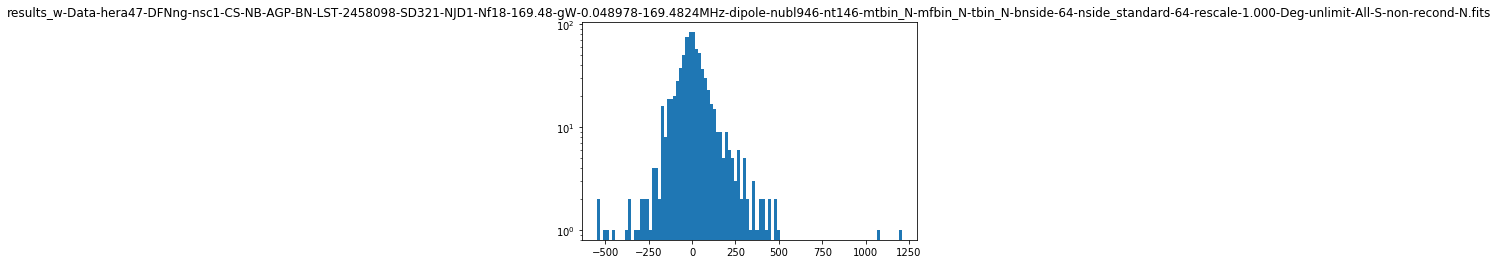

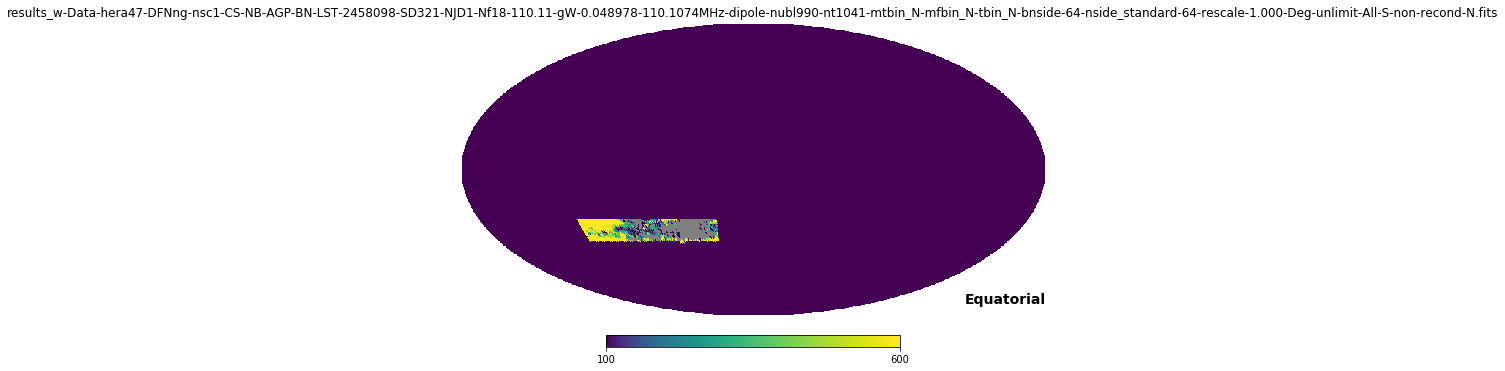

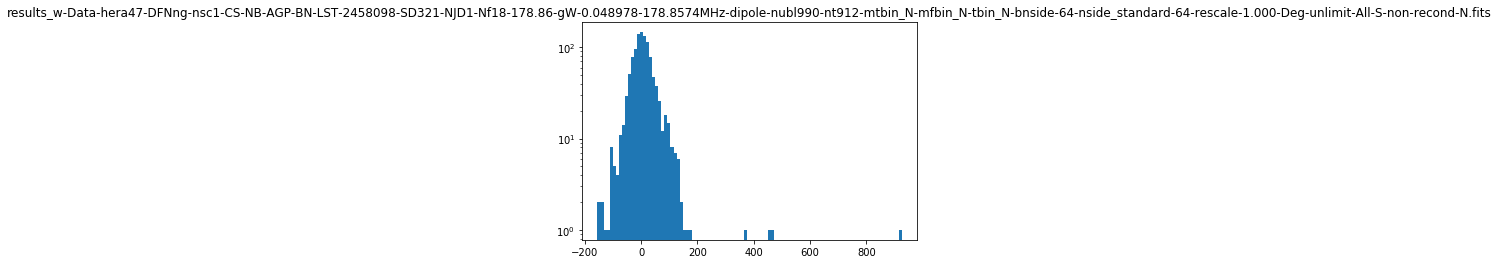

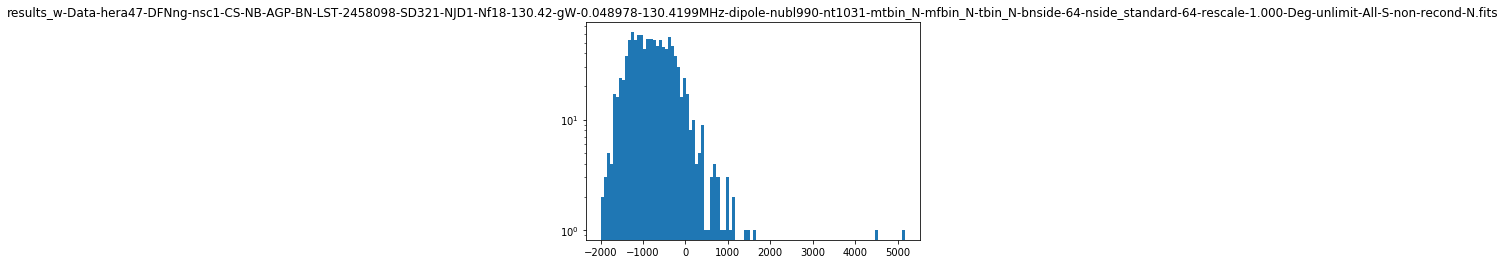

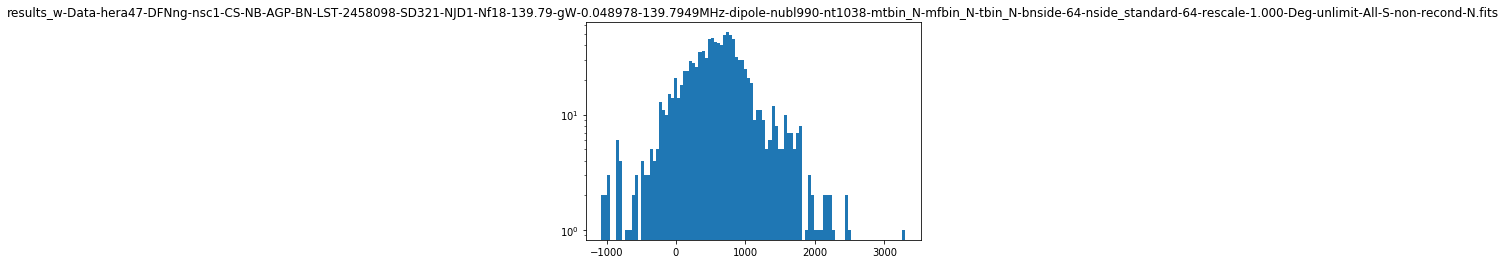

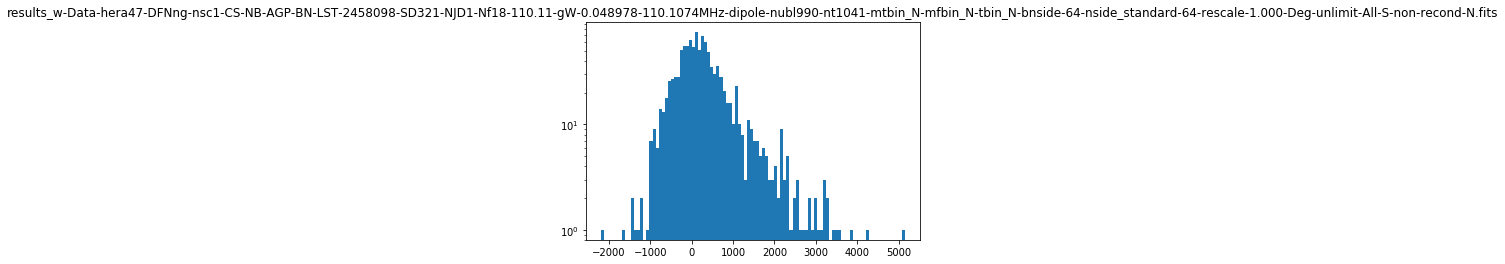

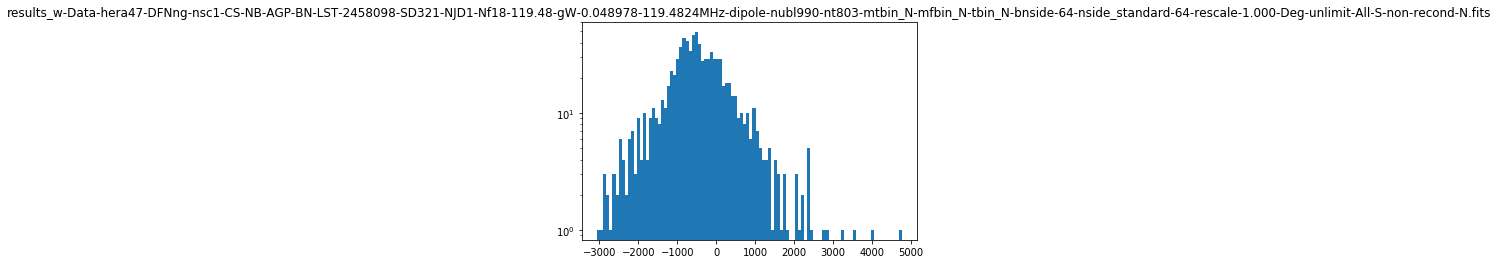

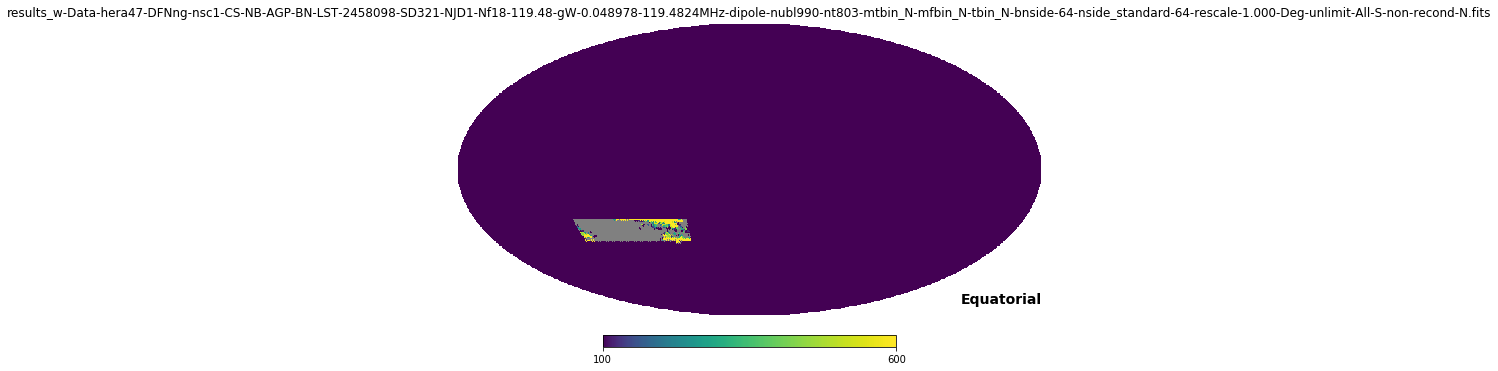

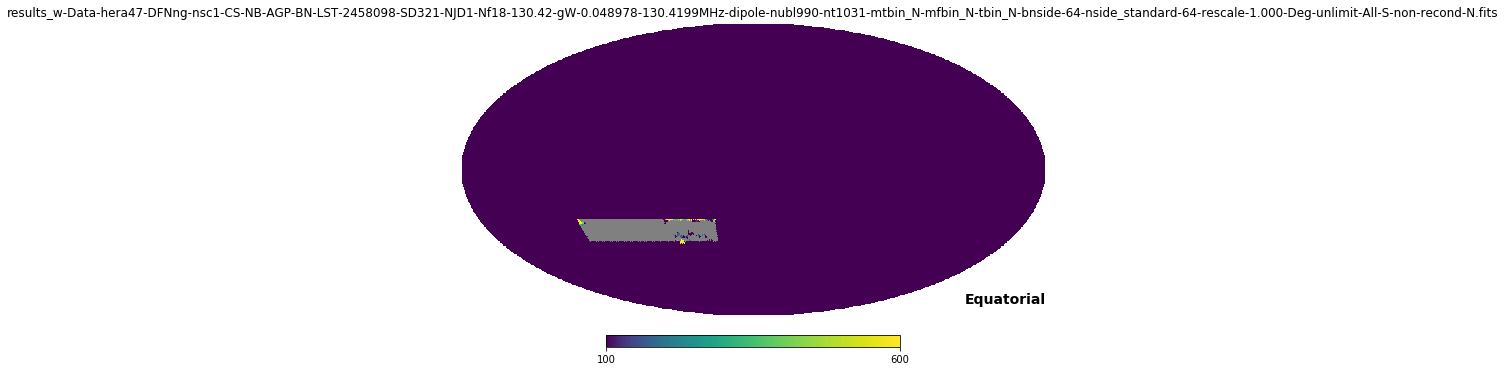

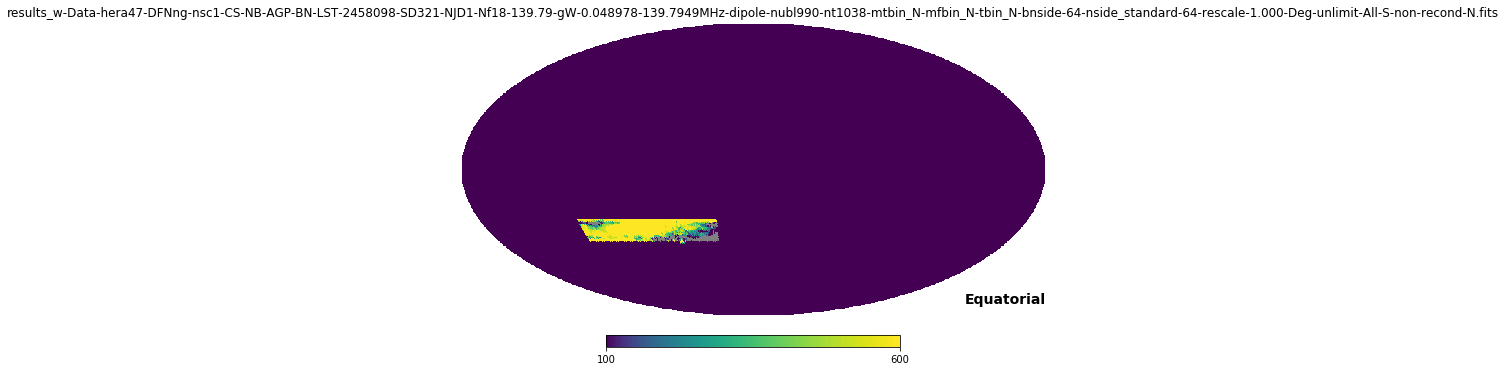

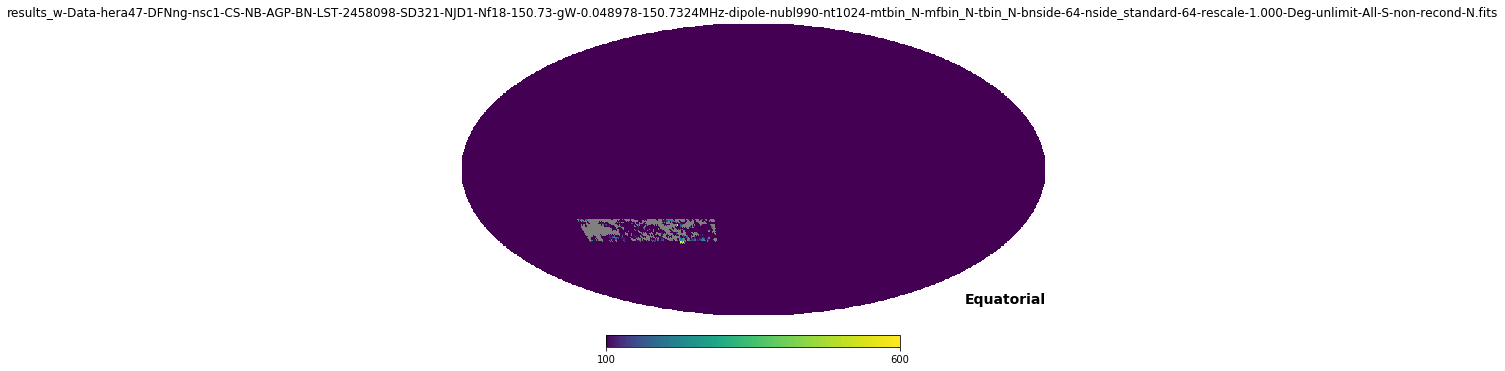

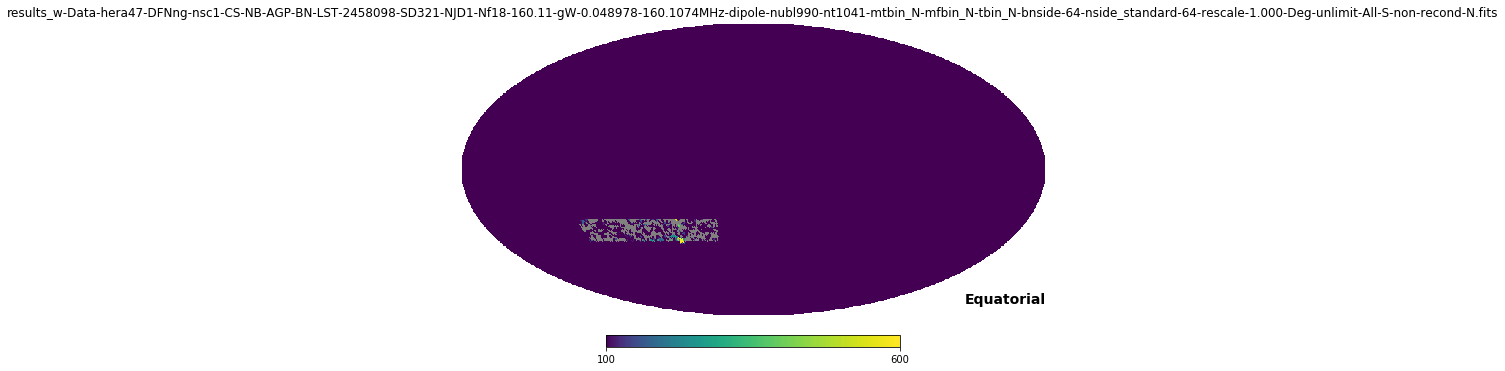

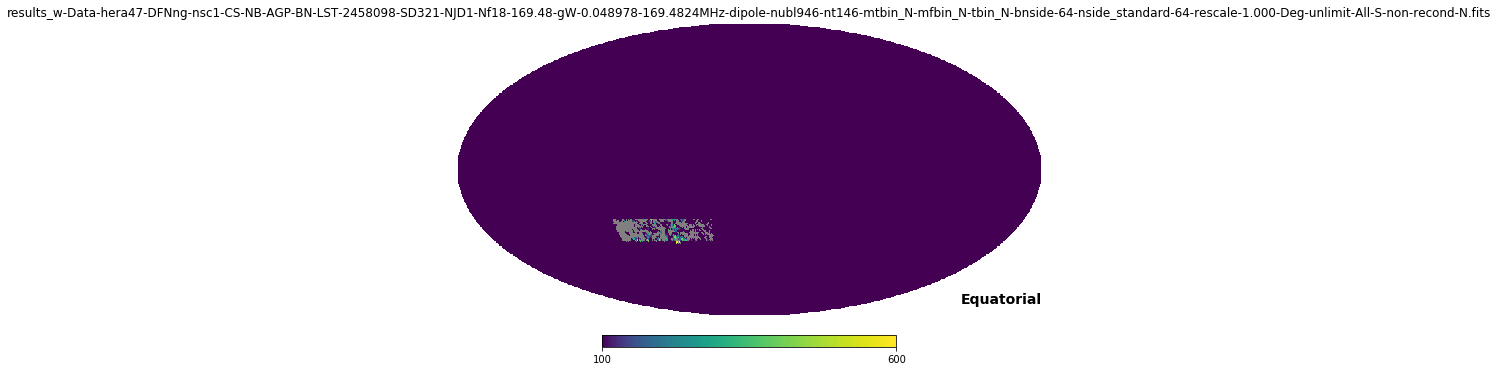

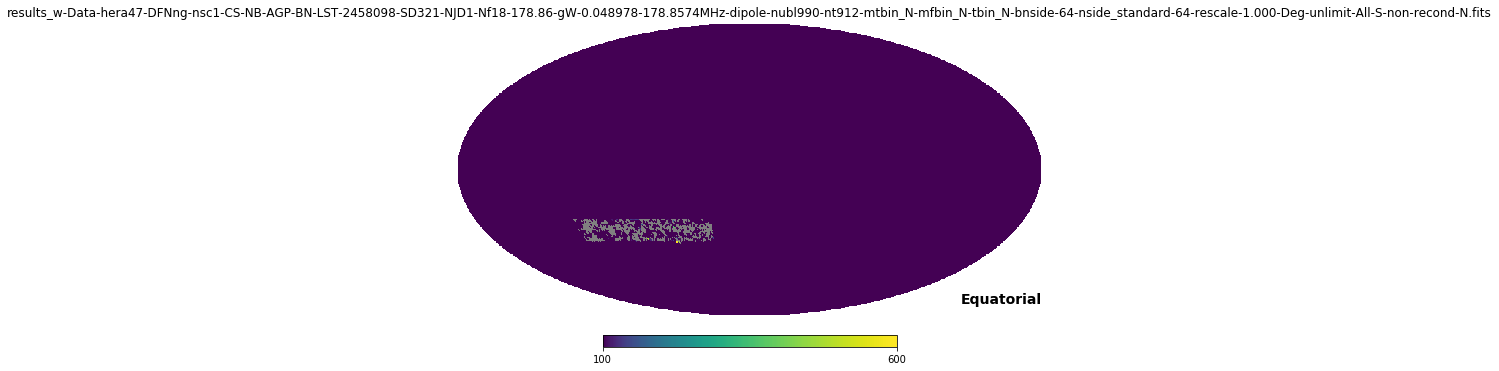

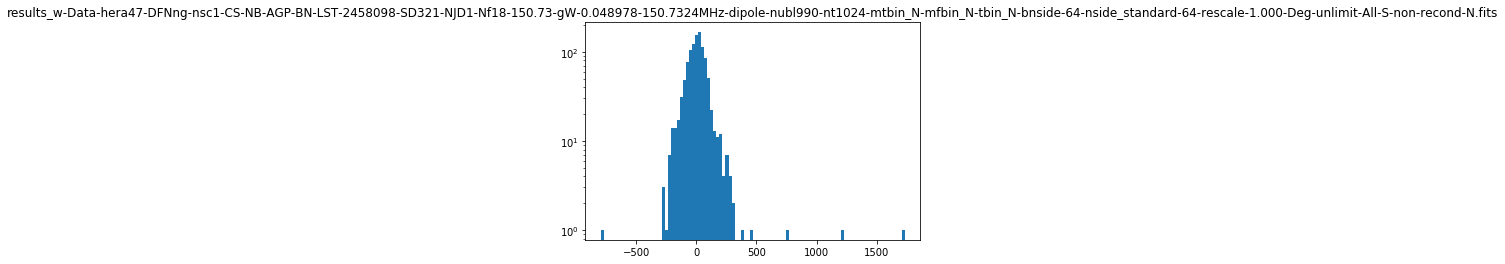

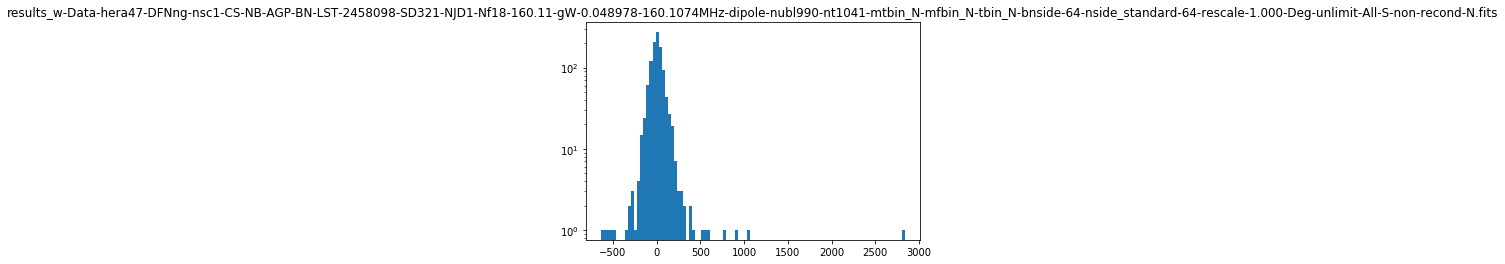

In [159]:
for id_file, fitfile in enumerate(filenames_64_321):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('STD of the Map64-part without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-2]][np.abs(map_fit[np.argsort(map_fit)[:-2]]) > 10**(-5)])))
    plt.figure(250000 + id_file)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(650000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()

In [160]:
nside_standard = 64
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_part_64 = fits.getdata(filenames_64_321[4]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_part_64)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_part_64)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_part_64[np.argsort(ww_solution_part_64)[-80:]]))




Bright_Pixels_Data: [[-34.22886633 -35.68533471 -30.69158768 -35.68533471 -34.95386526
  -27.27961274 -32.08995126 -27.27961274 -32.7971683  -35.68533471
  -34.22886633 -34.95386526 -34.22886633 -27.95318688 -28.63098984
  -26.61009781 -35.68533471 -34.95386526 -28.63098984 -27.27961274
  -27.95318688 -34.22886633 -30.         -35.68533471 -25.94447977
  -28.63098984 -34.22886633 -25.94447977 -26.61009781 -34.22886633
  -33.51005607 -33.51005607 -36.42357364 -27.95318688 -25.94447977
  -27.27961274 -29.31319896 -34.22886633 -34.95386526 -27.27961274
  -32.7971683  -34.22886633 -25.28260304 -35.68533471 -29.31319896
  -36.42357364 -35.68533471 -33.51005607 -35.68533471 -32.7971683
  -35.68533471 -29.31319896 -35.68533471 -34.22886633 -34.22886633
  -27.95318688 -34.95386526 -28.63098984 -34.95386526 -25.94447977
  -34.95386526 -36.42357364 -34.95386526 -36.42357364 -25.28260304
  -34.95386526 -25.28260304 -34.95386526 -35.68533471 -27.95318688
  -27.95318688 -36.42357364 -36.42357364 -3

(0, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt658-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map32-part without Fornax A: 48.3393048953
(1, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-119.48-gW-0.048978-119.4824MHz-dipole-nubl990-nt443-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map32-part without Fornax A: 76.0483798289
(2, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-130.42-gW-0.048978-130.4199MHz-dipole-nubl990-nt654-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-32-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map32-part without Fornax A: 33.4511787179
(3, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-139.79-gW-0.048978-139.7949MHz-dipole-nubl990-nt655-mtbin

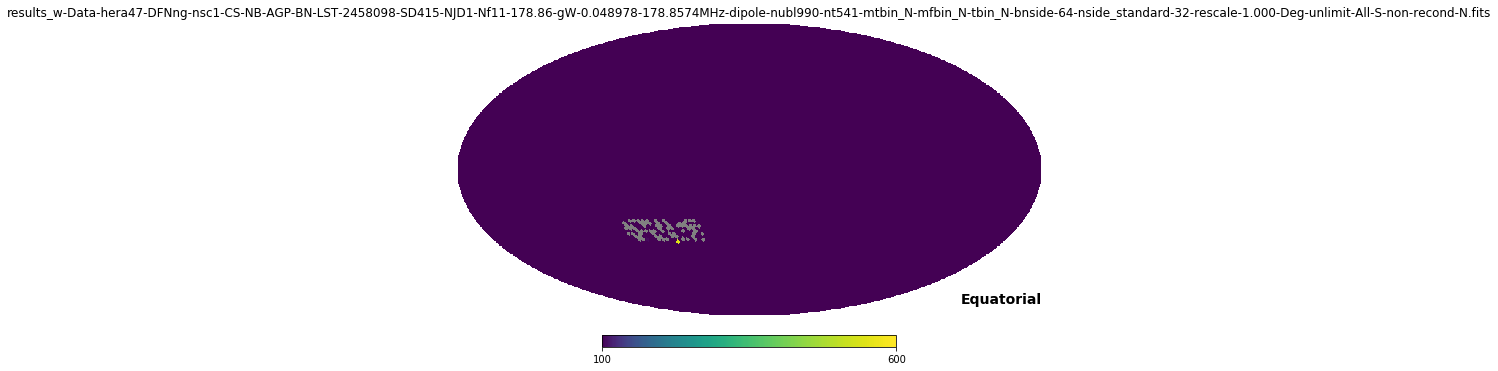

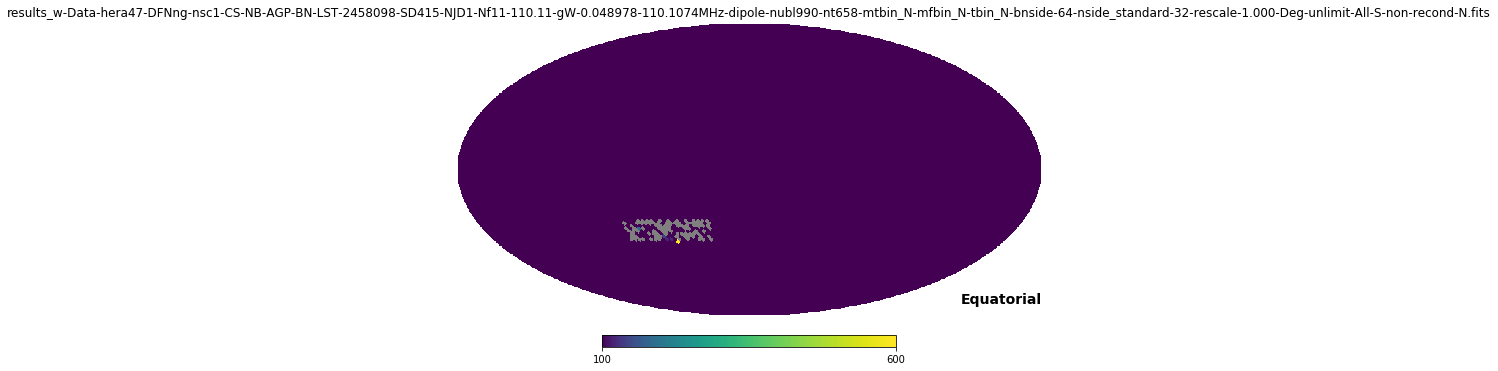

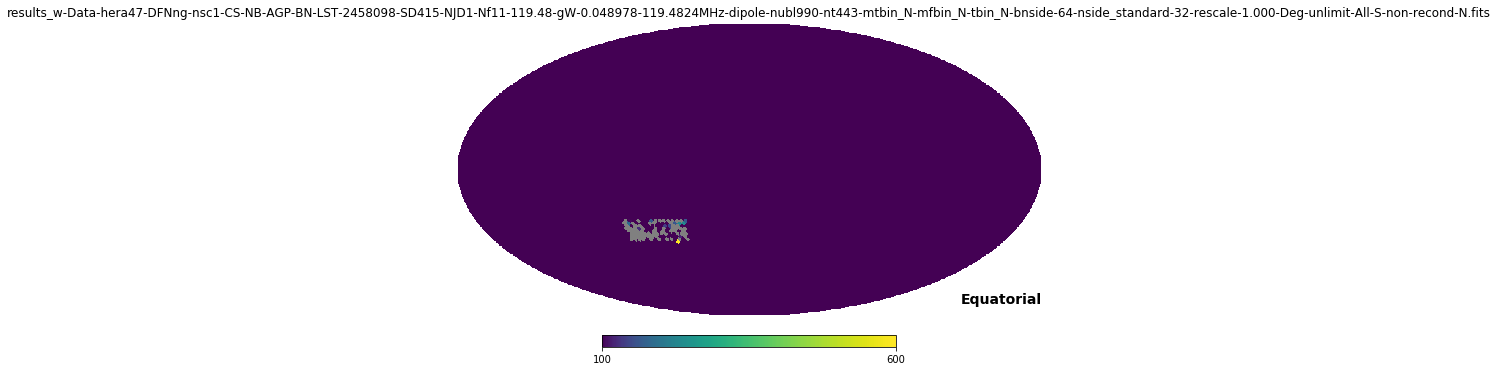

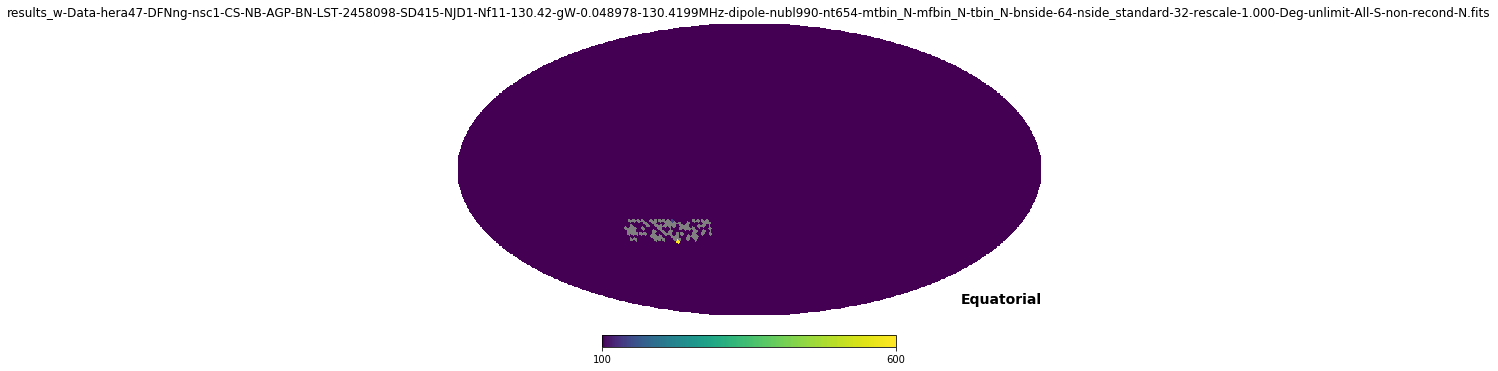

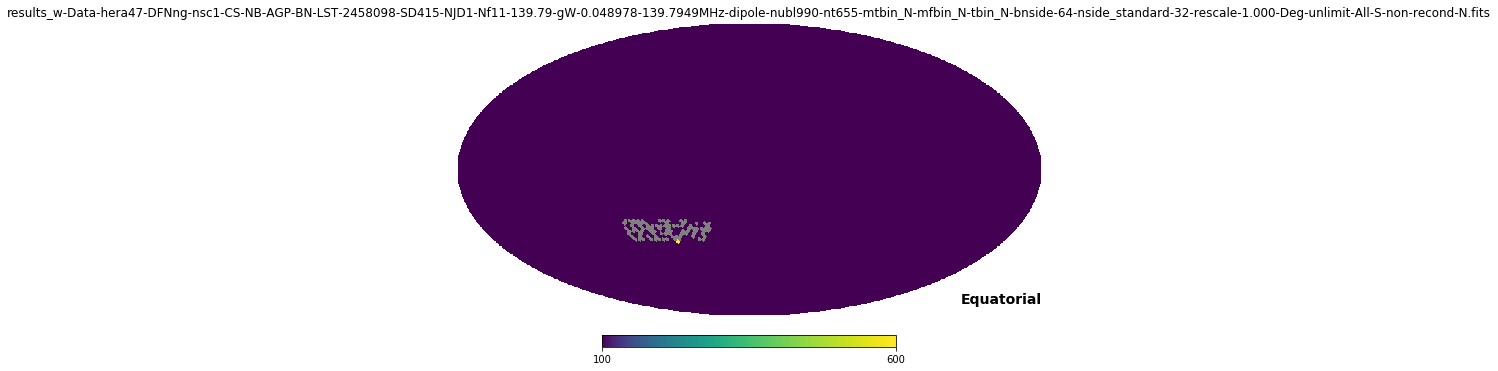

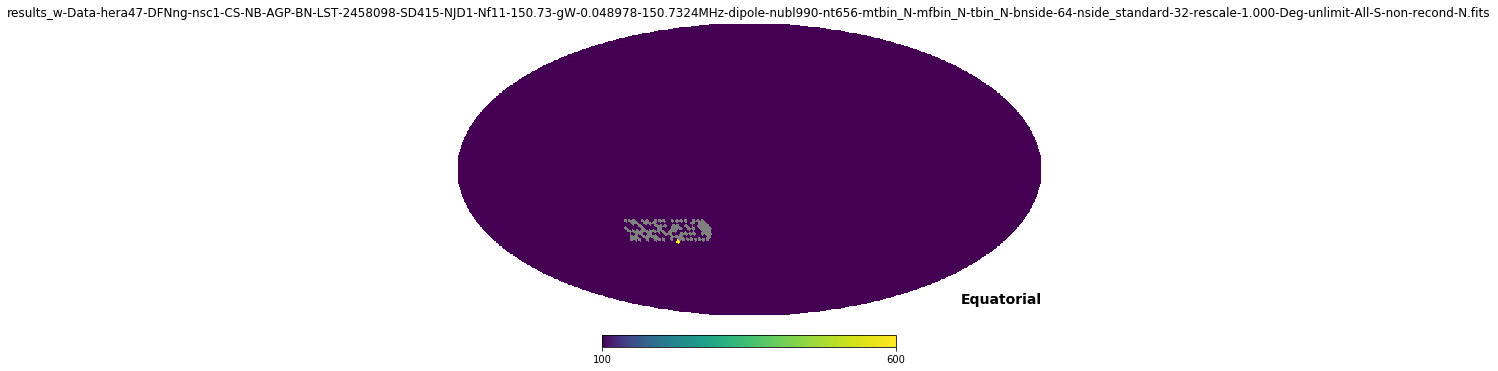

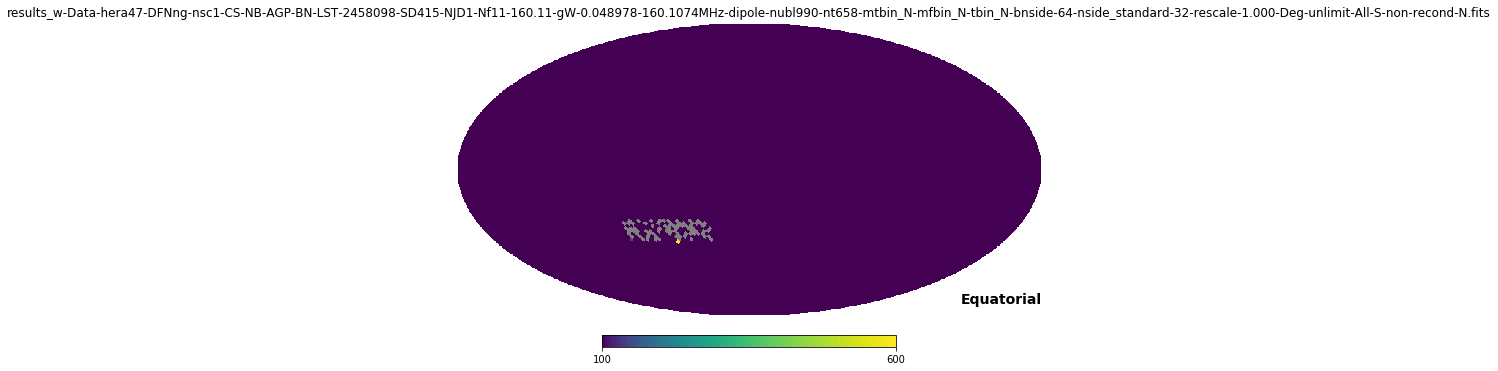

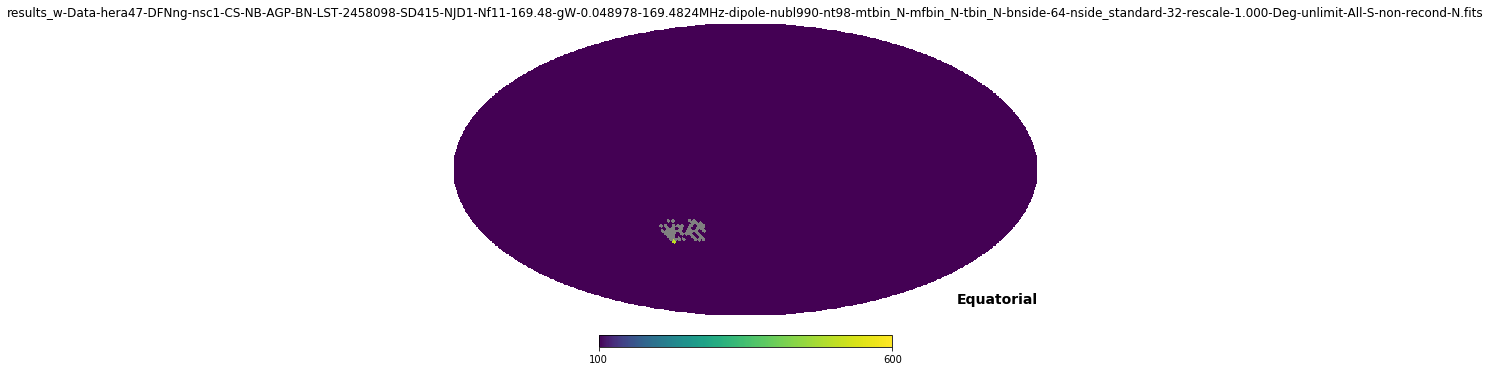

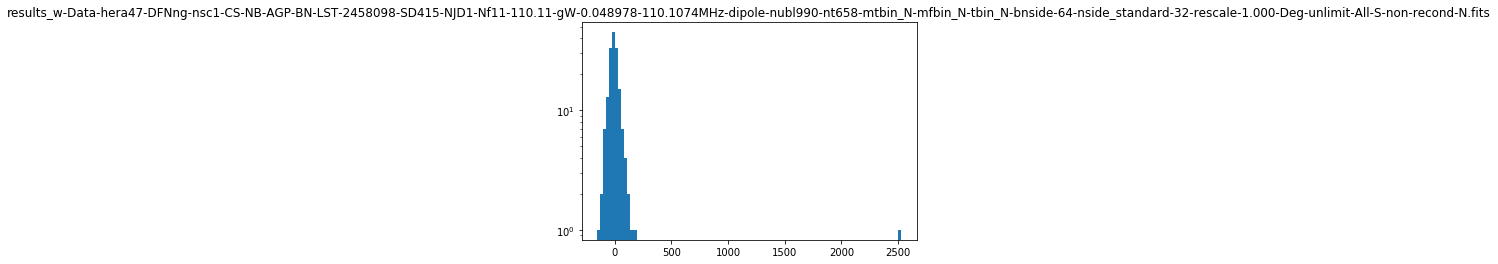

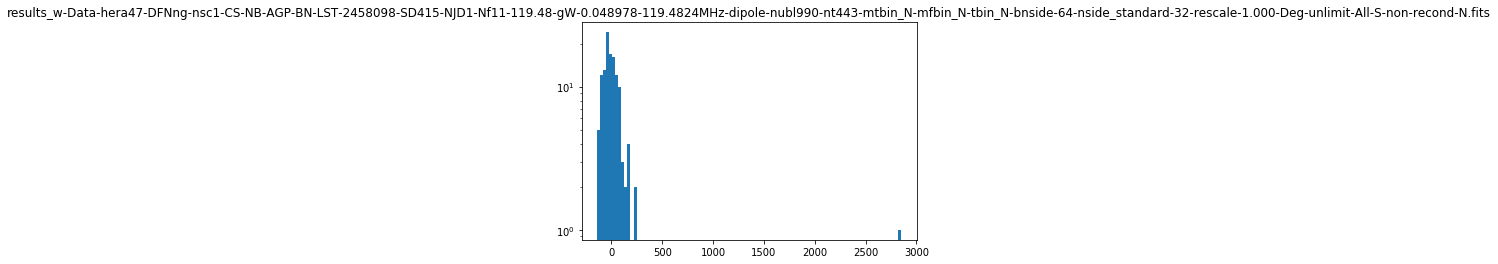

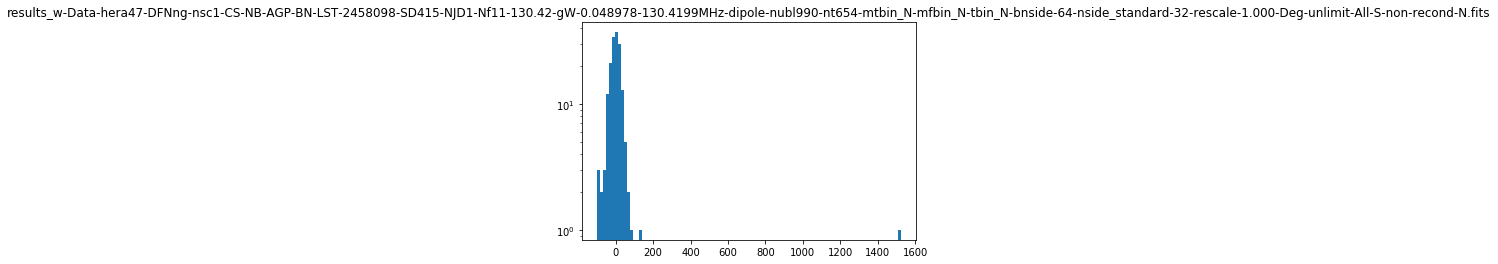

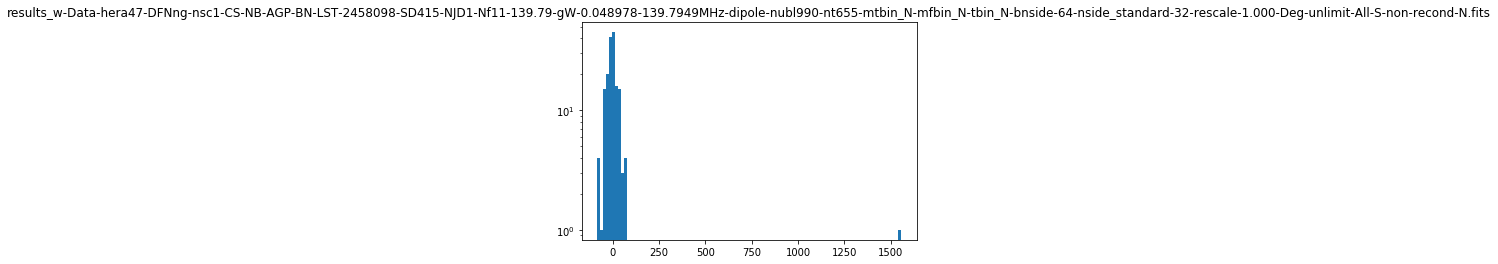

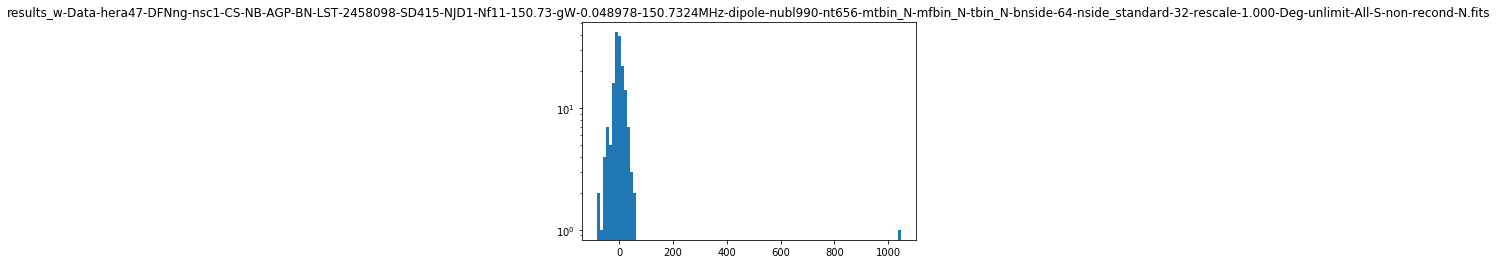

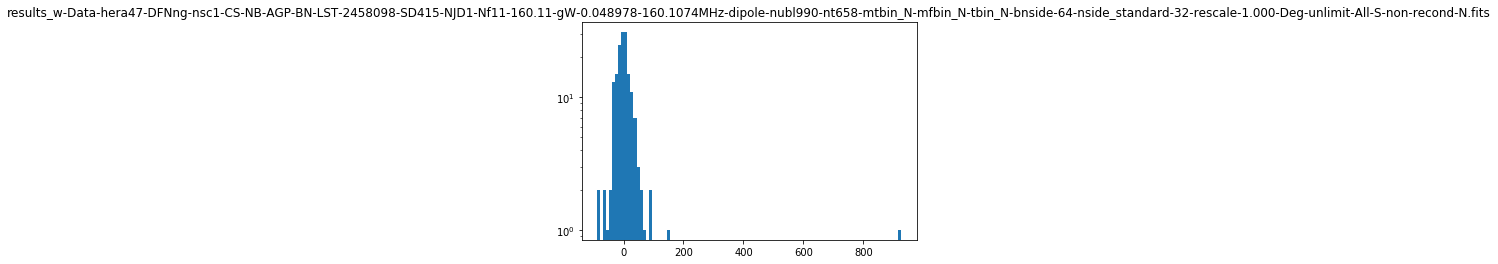

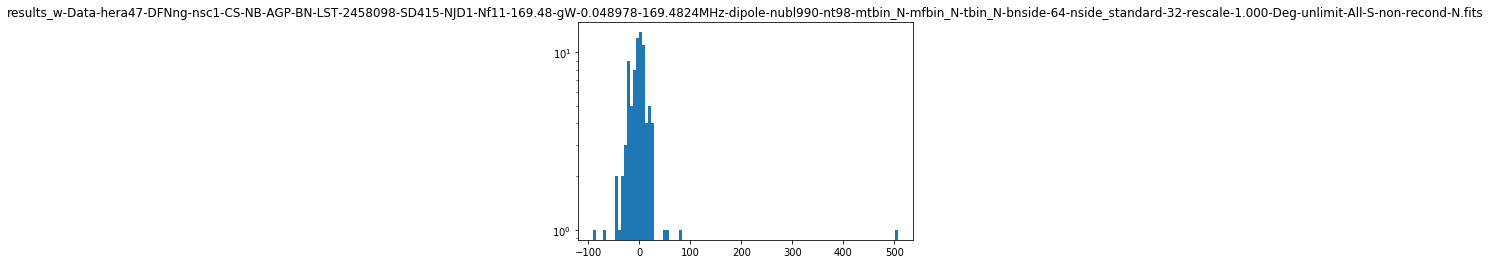

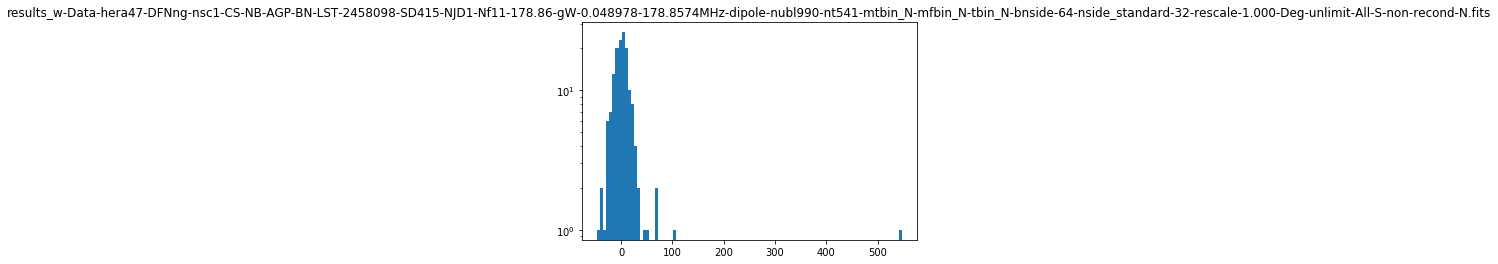

In [166]:
for id_file, fitfile in enumerate(filenames_32_415):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('STD of the Map32-part without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-1]][np.abs(map_fit[np.argsort(map_fit)[:-1]]) > 10**(-5)])))
    plt.figure(35000 + id_file)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(75000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()

In [170]:
nside_standard = 32
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_part415_32 = fits.getdata(filenames_32_415[3]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_part415_32)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_part415_32)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_part415_32[np.argsort(ww_solution_part415_32)[-40:]]))




Bright_Pixels_Data: [[ 76.81353334  73.86549609  78.28414761  78.28414761  72.38756093
   79.75282793  79.75282793  72.38756093  75.34073424  73.86549609
   73.86549609  73.86549609  73.86549609  75.34073424  75.34073424
   76.81353334  67.93492865  69.42254649  69.42254649  70.90666664
   70.90666664  70.90666664  72.38756093  72.38756093  73.86549609
   70.90666664  72.38756093  72.38756093  81.21982232  81.21982232
   79.75282793  72.38756093  78.28414761  78.28414761  79.75282793
   70.90666664  75.34073424  70.90666664  75.34073424  76.81353334
   76.81353334  76.81353334  72.38756093  73.86549609  82.68537621
  -25.94447977 -25.94447977 -27.27961274 -32.7971683  -31.38816646
  -30.         -34.22886633 -30.         -31.38816646 -32.7971683
  -31.38816646 -28.63098984 -34.22886633 -34.22886633 -32.7971683
  -34.22886633 -30.         -28.63098984 -27.27961274 -34.22886633
  -27.27961274 -30.         -35.68533471 -32.7971683  -28.63098984
  -25.94447977 -25.94447977 -32.7971683  -32

(0, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-110.11-gW-0.048978-110.1074MHz-dipole-nubl990-nt658-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map64-part without Fornax A: 511.345114584
(1, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-119.48-gW-0.048978-119.4824MHz-dipole-nubl990-nt443-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map64-part without Fornax A: 622.089238069
(2, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-130.42-gW-0.048978-130.4199MHz-dipole-nubl990-nt654-mtbin_N-mfbin_N-tbin_N-bnside-64-nside_standard-64-rescale-1.000-Deg-unlimit-All-S-non-recond-N.fits')
STD of the Map64-part without Fornax A: 594.052606914
(3, 'results_w-Data-hera47-DFNng-nsc1-CS-NB-AGP-BN-LST-2458098-SD415-NJD1-Nf11-139.79-gW-0.048978-139.7949MHz-dipole-nubl990-nt655-mtbin

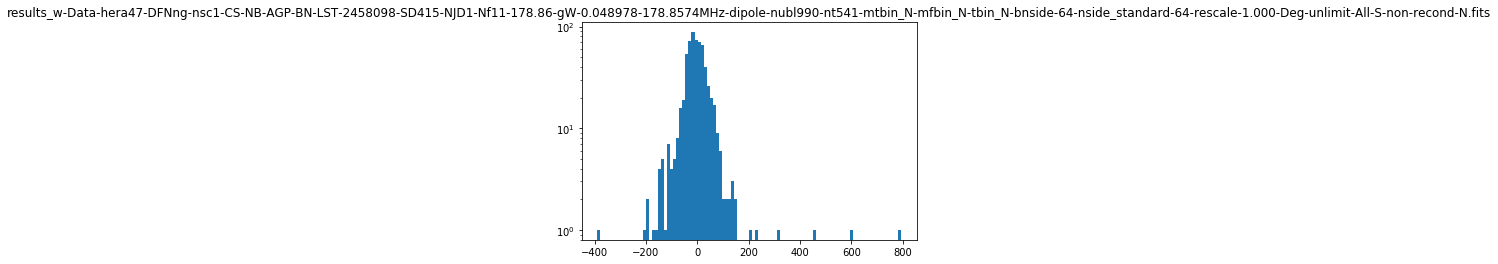

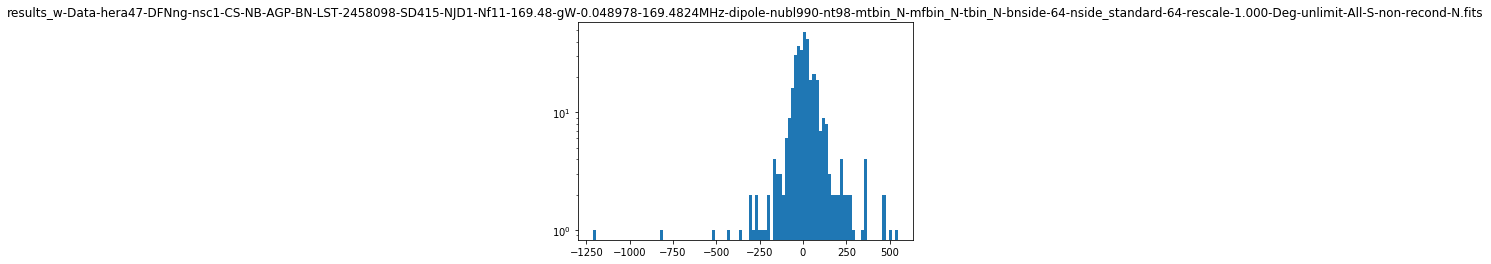

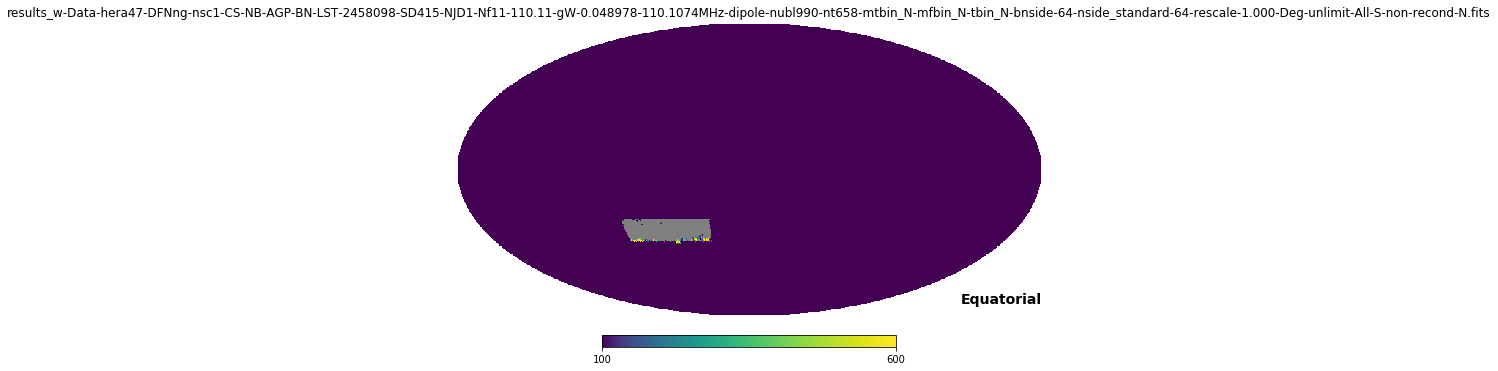

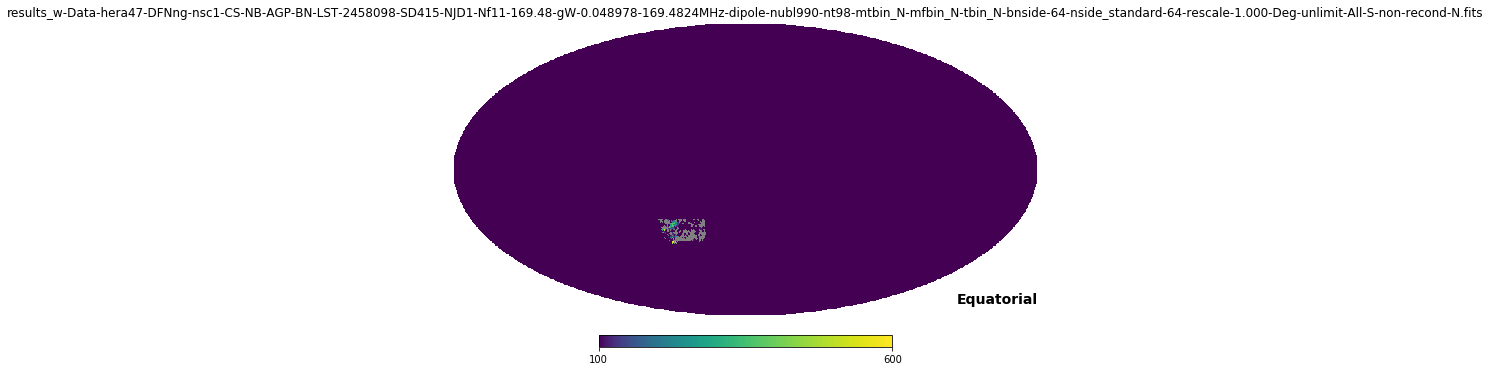

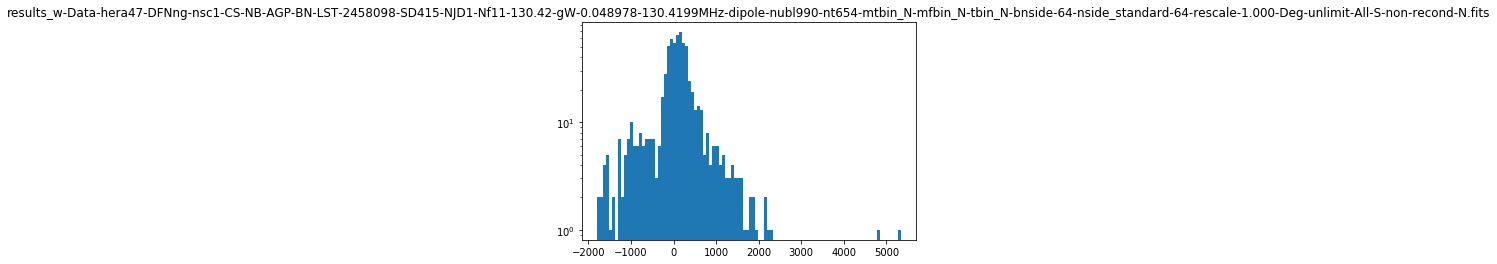

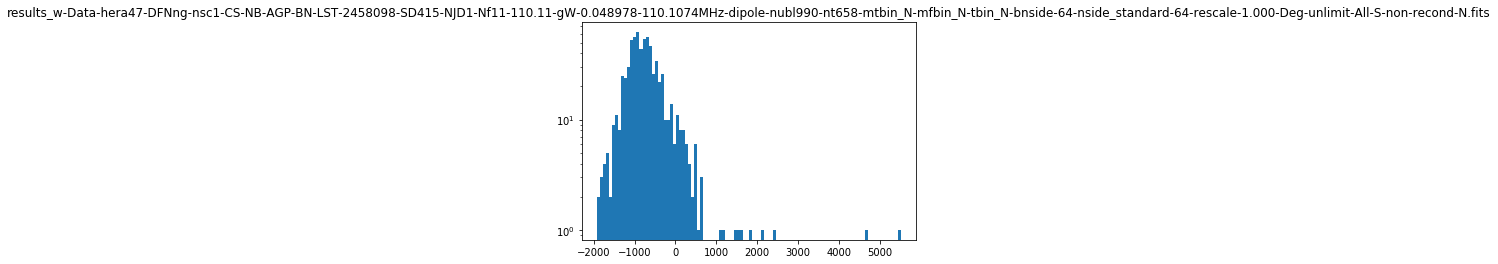

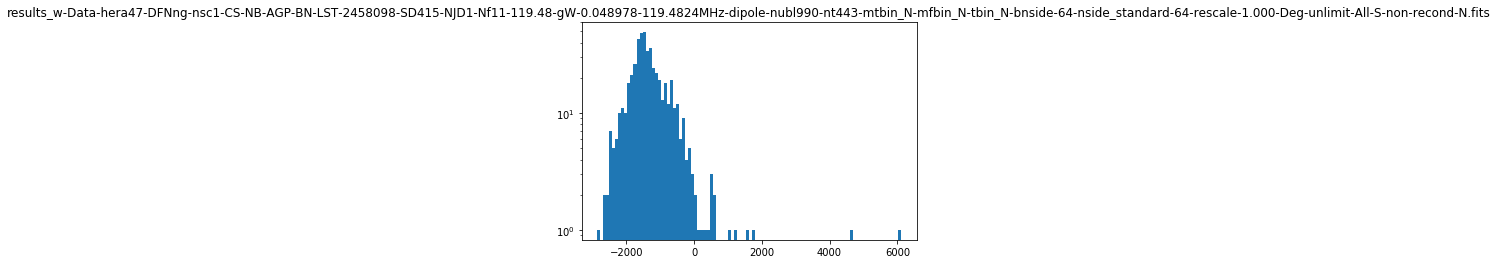

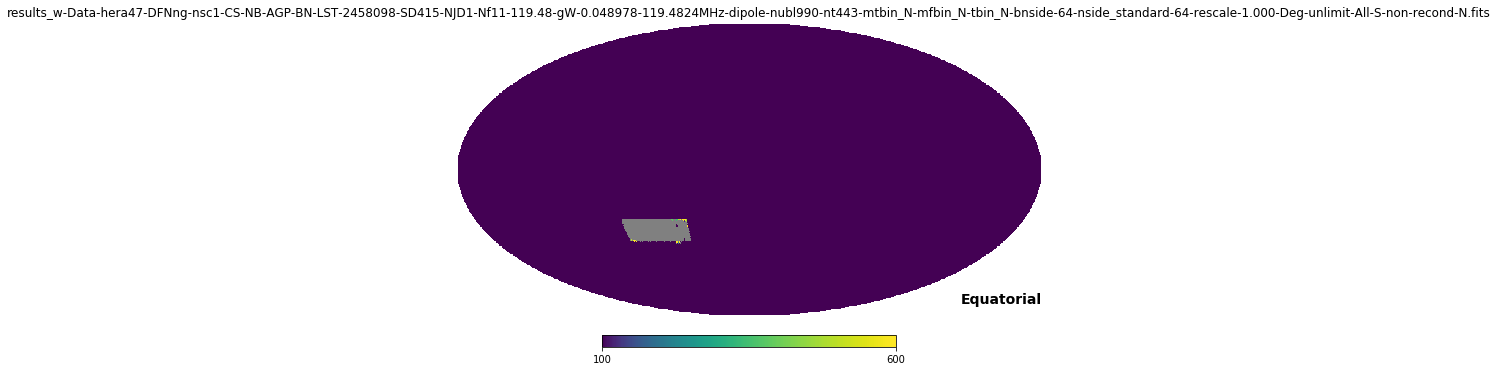

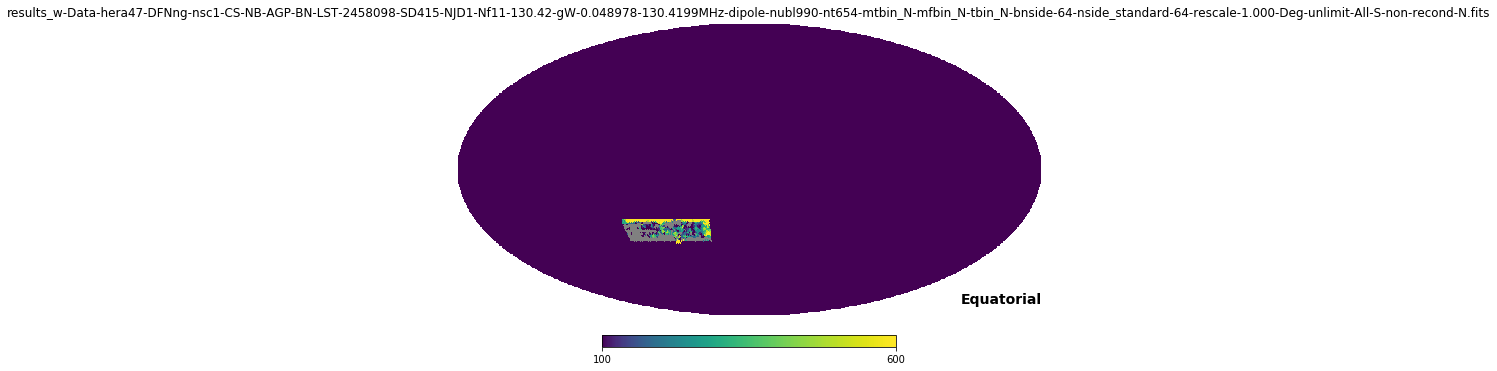

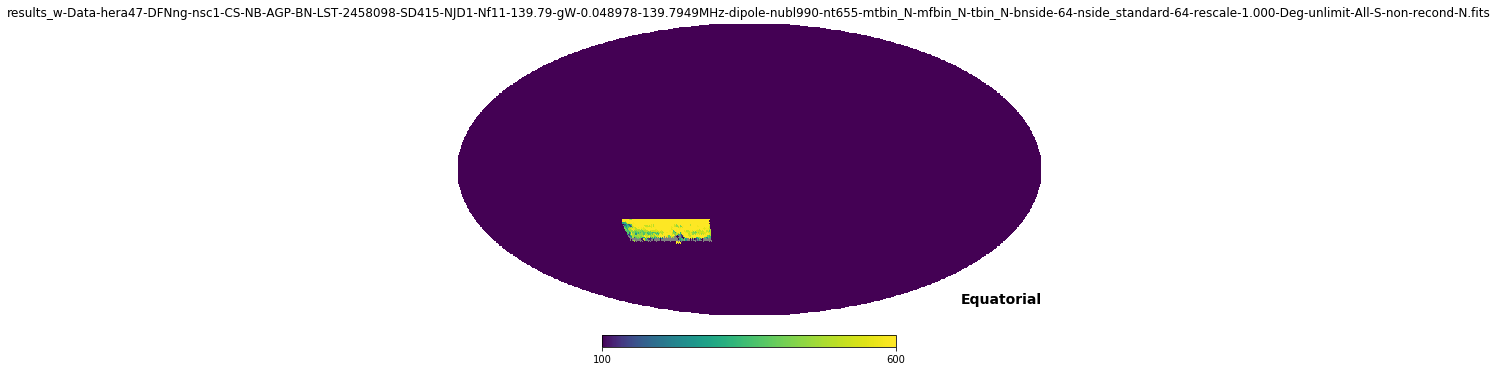

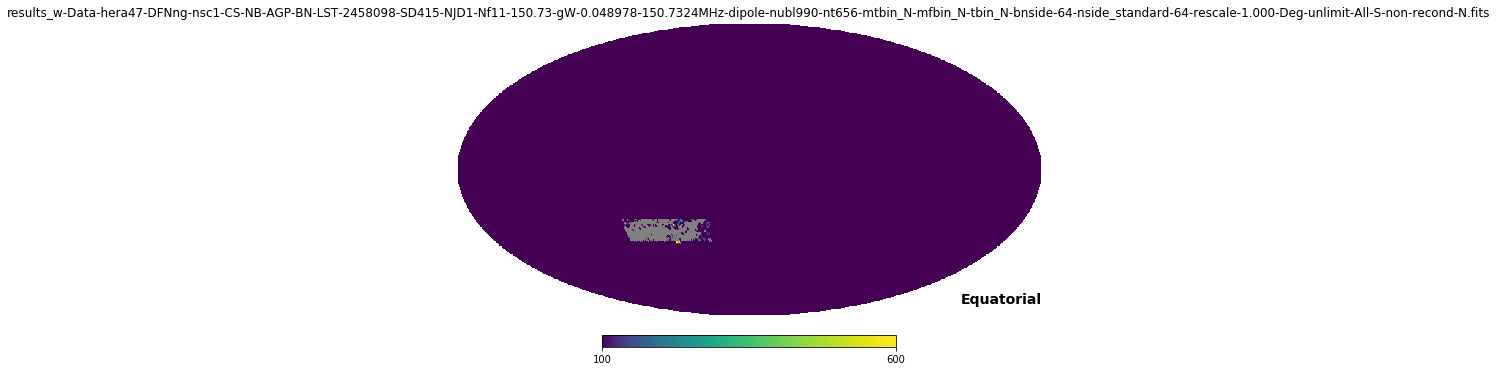

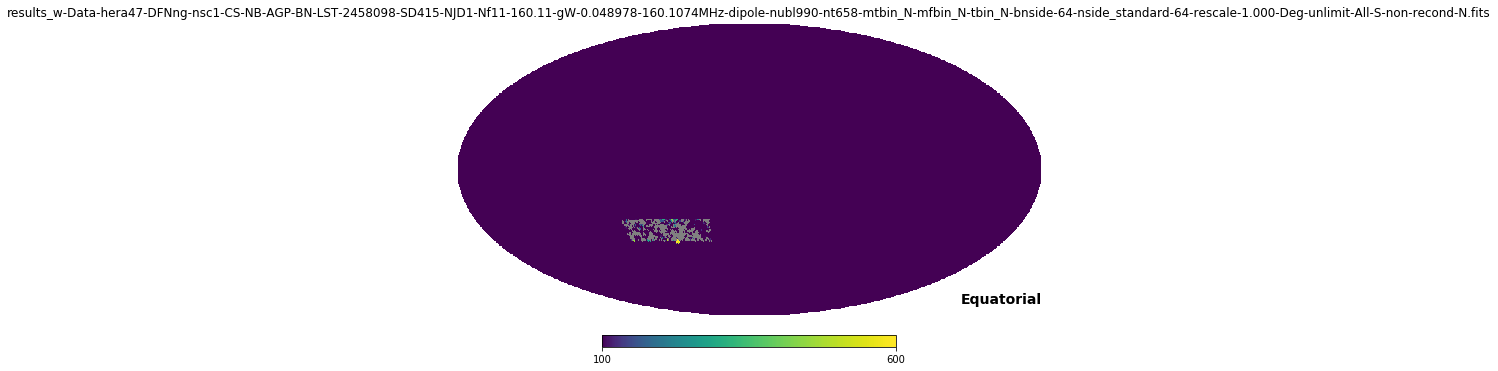

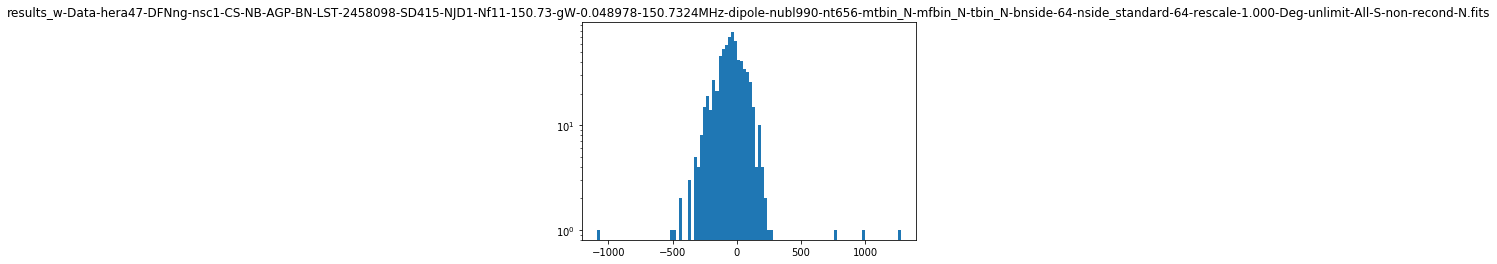

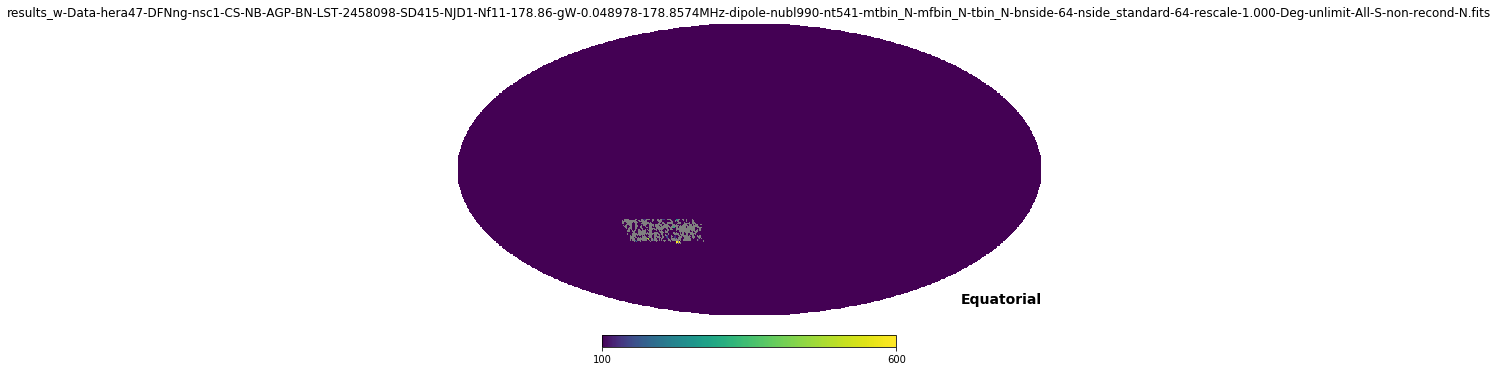

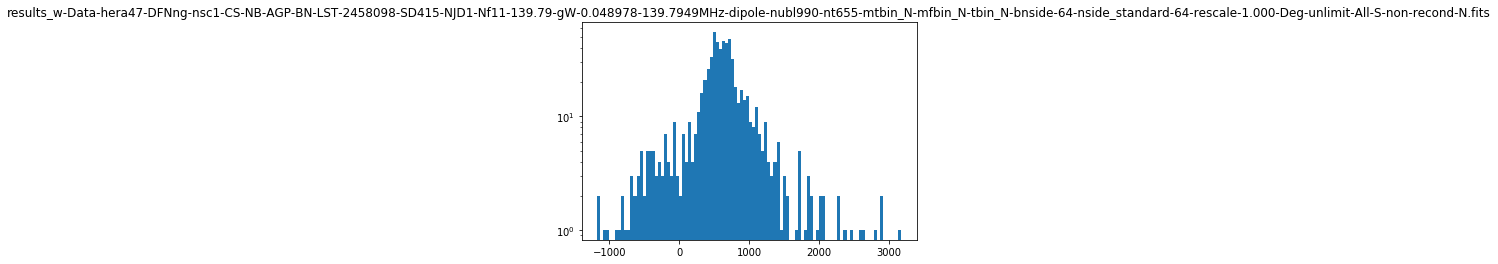

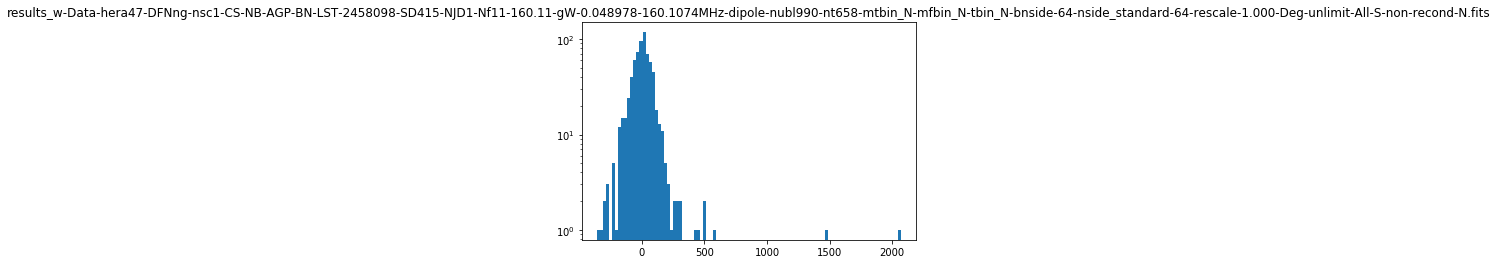

In [171]:
for id_file, fitfile in enumerate(filenames_64_415):
    name = fitfile.split('/')[-1]
    print(id_file, name)
    map_fit = fits.getdata(fitfile)
    print('STD of the Map64-part without Fornax A: {0}'.format(np.std(map_fit[np.argsort(map_fit)[:-2]][np.abs(map_fit[np.argsort(map_fit)[:-2]]) > 10**(-5)])))
    plt.figure(350000 + id_file)
    plt.hist(map_fit[np.abs(map_fit) > 10**(-5)], bins=100, log=True)
    plt.title(name)
    plt.show()
    #plt.close()
    plt.figure(750000 + id_file)
    hp.mollview(map_fit, title=name, norm='log', min=100, max=600, coord='C', nest=True)
    #hp.graticule(dmer=30., dpar=30.)
    plt.show()
    #plt.close()

In [181]:
nside_standard = 64
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)

FornaxA_Direction = np.array([90. - thetas_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi,
                              phis_standard[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)] * 180. / np.pi])
FornaxA_Index = np.arange(len(thetas_standard))[np.isclose(90. - thetas_standard * 180. / np.pi, -37.20833, atol=2.) & np.isclose(phis_standard * 180. / np.pi, 50.67375, atol=2.)]

ww_solution_part415_64 = fits.getdata(filenames_64_415[5]).squeeze()
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(ww_solution_part415_64)[-120:]] * 180. / np.pi, phis_standard[np.argsort(ww_solution_part415_64)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(ww_solution_part415_64[np.argsort(ww_solution_part415_64)[-80:]]))





Bright_Pixels_Data: [[-25.28260304 -25.94447977 -28.63098984 -27.27961274 -32.08995126
  -28.63098984 -34.95386526 -27.95318688 -27.27961274 -25.94447977
  -30.         -32.08995126 -25.94447977 -34.22886633 -28.63098984
  -30.         -32.08995126 -26.61009781 -35.68533471 -32.08995126
  -30.69158768 -28.63098984 -27.27961274 -25.28260304 -28.63098984
  -27.27961274 -27.27961274 -30.69158768 -31.38816646 -27.27961274
  -30.         -27.27961274 -33.51005607 -35.68533471 -35.68533471
  -35.68533471 -26.61009781 -25.94447977 -25.94447977 -28.63098984
  -28.63098984 -36.42357364 -25.28260304 -36.42357364 -25.28260304
  -35.68533471 -34.22886633 -27.95318688 -28.63098984 -30.69158768
  -27.27961274 -30.69158768 -25.28260304 -25.28260304 -30.
  -36.42357364 -25.94447977 -25.28260304 -28.63098984 -34.22886633
  -34.22886633 -25.28260304 -29.31319896 -29.31319896 -34.22886633
  -27.95318688 -34.95386526 -31.38816646 -25.28260304 -25.28260304
  -35.68533471 -25.28260304 -35.68533471 -34.95386

Filename: /Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/data/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard32-Eq.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (12288,)   float64   
Data shape, min, max:  (12288,) 123.393245559361 7350.223968374633
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
Bright_Pixels_Data: [[ 13.24801491 -58.91977535   2.38801546   7.18075578 -25.94447977
   14.47751219  -7.18075578 -46.57184741 -13.24801491 -20.74237995
  -40.22818473  40.22818473   9.59406823 -41.8103149    2.38801546
    8.38553865 -16.9577633  -25.94447977  -2.38801546 -44.99388015
  -24.62431835 -32.7971683  -61.94383702  -1.19374844  -4.78019185
  -55.87335044 -49.70239033   5.9791568  -46.57184741 -27.27961274
  -22.02431284 -54.3409123  -51.25580695  57.39952354 -43.40685849
  -18.2099568

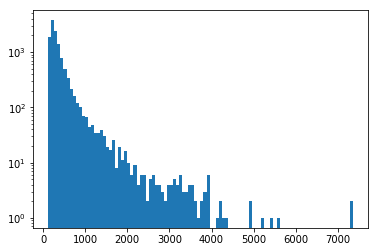

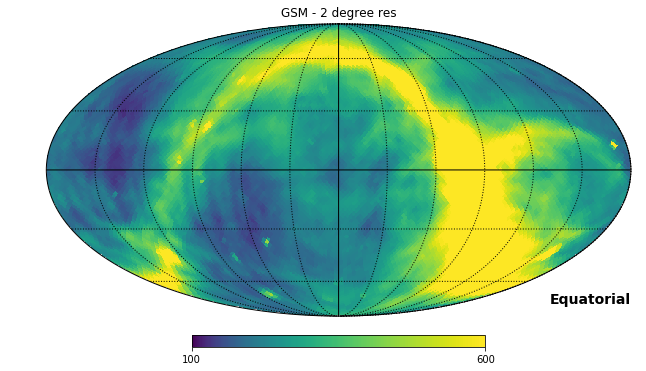

In [185]:
# GSM map with two degrees resolution
GSM32_path = DATA_PATH + '/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard32-Eq.fits'
hdul = fits.open(GSM32_path)
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata(GSM32_path)
plt.hist(testmap,bins=100,log=True)
hdul.close()
hp.mollview(testmap, title="GSM - 2 degree res", norm='log', min=100, max=600, coord='C', nest=True)
hp.graticule(dmer=30,dpar=30)

nside_standard = 32
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(testmap)[-120:]] * 180. / np.pi, phis_standard[np.argsort(testmap)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(testmap[np.argsort(testmap)[-80:]]))

Filename: /Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/data/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard64-Eq.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (49152,)   float64   
Data shape, min, max:  (49152,) 119.61854632832329 12303.862241998748
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
Bright_Pixels_Data: [[ -9.59406823 -41.01449967 -16.33482278 -34.95386526 -49.70239033
  -30.         -40.22818473 -13.24801491 -12.63562509 -39.45089471
  -10.80692287 -17.58277601 -21.38194258 -44.99388015 -42.60980698
  -11.41515774 -19.47122063 -45.78396716 -53.57223328 -52.80185378
  -32.7971683  -50.48004426 -23.96948232 -15.0947871  -20.74237995
  -37.16889966 -40.22818473  -6.57959294 -10.19991809 -32.08995126
  -32.7971683  -38.68218745 -46.57184741 -37.92165078 -52.02972742
  -48.1412

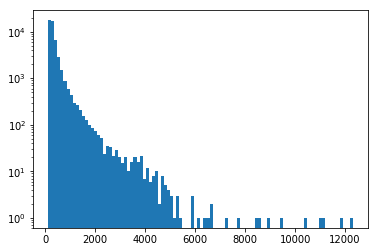

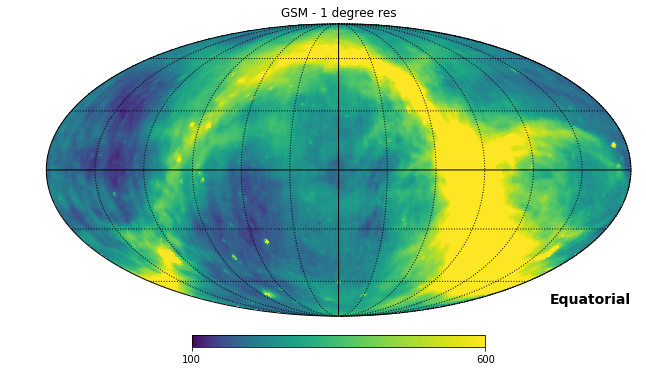

In [184]:
# GSM map with 1 degree resolution
GSM64_path = DATA_PATH + '/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard64-Eq.fits'
hdul = fits.open(GSM64_path)
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata(GSM64_path)
plt.hist(testmap,bins=100,log=True)
hdul.close()
hp.mollview(testmap, title="GSM - 1 degree res", norm='log', min=100, max=600, coord='C', nest=True)
hp.graticule(dmer=30,dpar=30)

nside_standard = 64
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(testmap)[-120:]] * 180. / np.pi, phis_standard[np.argsort(testmap)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(testmap[np.argsort(testmap)[-80:]]))

Filename: /Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/HERA_MapMaking_VisibilitySimulation/data/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard64-Eq.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (49152,)   float64   
Data shape, min, max:  (49152,) 119.61854632832329 12303.862241998748
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
Bright_Pixels_Data: [[-25.61308322 -25.94447977 -26.27681156 -34.95386526 -30.
  -31.03924001 -20.74237995 -22.02431284 -24.62431835 -22.3465879
  -26.94435818 -21.38194258  40.62018519 -32.08995126 -31.73839424
  -47.35757623 -47.74965083 -21.0618176  -25.94447977 -30.69158768
  -26.61009781 -22.3465879  -31.38816646 -21.0618176  -34.59057498
  -28.63098984 -22.99339431 -23.96948232 -46.57184741 -47.35757623
  -31.03924001 -22.66960987 -30.69158768 -22.02431284 -27.61588198
  -27.27961274 -28.

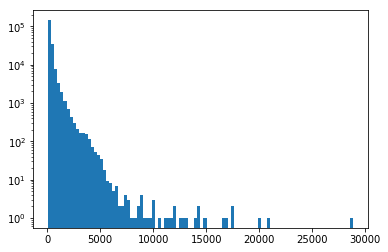

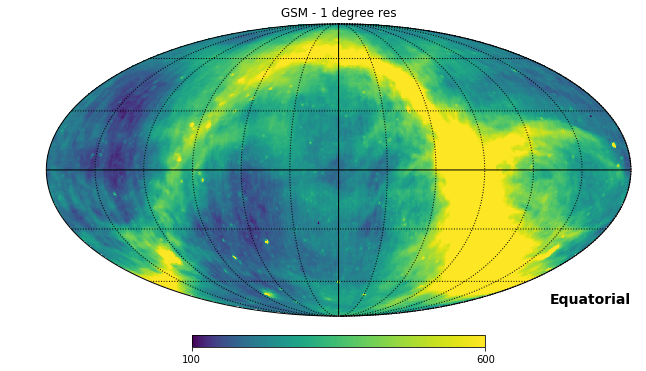

In [183]:
# GSM map with 1 degree resolution
GSM128_path = DATA_PATH + '/R_GSM_NoMask-Freq150.7324MHz-Nside_Standard128-Eq.fits'
hdul = fits.open(GSM64_path)
hdul.info()
hdr = hdul[0].header
data = hdul[0].data
hdr
print 'Data shape, min, max: ',data.shape, min(data), max(data)
testmap = fits.getdata(GSM128_path)
plt.hist(testmap,bins=100,log=True)
hdul.close()
hp.mollview(testmap, title="GSM - 1 degree res", norm='log', min=100, max=600, coord='C', nest=True)
hp.graticule(dmer=30,dpar=30)

nside_standard = 128
thetas_standard, phis_standard = hpf.pix2ang(nside_standard, range(hpf.nside2npix(nside_standard)), nest=True)
bright_pixels_Data = np.array([90. - thetas_standard[np.argsort(testmap)[-120:]] * 180. / np.pi, phis_standard[np.argsort(testmap)[-120:]] * 180. / np.pi])
print('Bright_Pixels_Data: {}'.format(bright_pixels_Data))
print('Top Flux: {}'.format(testmap[np.argsort(testmap)[-80:]]))